#Football Analysis - Regression task (transfer value)
###FIFA21 Players dataset

In [1]:
# mounting drive to colab environment

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# importing all the required packages

import numpy as np
import pandas as pd
import sklearn as ski
import seaborn as sns
import matplotlib as map
from matplotlib import pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import HuberRegressor


In [5]:
# downloading the dataset from drive and saving in a dataframe

path = "/content/drive/MyDrive/AML project/Dataset/players.csv"
df = pd.read_csv(path)

In [6]:
# descriptive statistics of the dataframe

df.describe()

int_player_id    int_height    int_weight  int_overall_rating  \
count   19002.000000  19002.000000  19002.000000        19002.000000   
mean     9501.500000    181.225660     75.046311           65.754868   
std      5485.549243      6.847472      7.078378            6.948835   
min         1.000000    155.000000     50.000000           47.000000   
25%      4751.250000    176.000000     70.000000           61.000000   
50%      9501.500000    181.000000     75.000000           66.000000   
75%     14251.750000    186.000000     80.000000           70.000000   
max     19002.000000    206.000000    110.000000           93.000000   

       int_potential_rating  int_best_overall_rating     int_value  \
count          19002.000000             19002.000000  1.900200e+04   
mean              71.148932                66.784286  2.891449e+06   
std                6.115352                 6.733926  7.733189e+06   
min               48.000000                48.000000  0.000000e+00   
25%               67.000000                62.000000  4.750000e+05   
50%               71.000000                67.000000  9.500000e+05   
75%               75.000000                71.000000  2.000000e+06   
max               95.000000                93.000000  1.855000e+08   

            int_wage   int_team_id  int_crossing  ...  int_strength  \
count   19002.000000  18767.000000  19002.000000  ...  19002.000000   
mean     9113.167035    332.655086     49.690454  ...     64.829386   
std     19735.324238    196.415422     18.141514  ...     12.469760   
min         0.000000      1.000000      6.000000  ...     16.000000   
25%      1000.000000    162.000000     38.000000  ...     57.000000   
50%      3000.000000    330.000000     54.000000  ...     66.000000   
75%      8000.000000    502.000000     63.000000  ...     74.000000   
max    560000.000000    681.000000     94.000000  ...     97.000000   

       int_long_shots  int_weak_foot  int_skill_moves  \
count    19002.000000   19002.000000     19002.000000   
mean        46.812967       2.942217         2.365540   
std         19.307572       0.669568         0.766687   
min          4.000000       1.000000         1.000000   
25%         32.000000       3.000000         2.000000   
50%         51.000000       3.000000         2.000000   
75%         62.000000       3.000000         3.000000   
max         94.000000       5.000000         5.000000   

       int_international_reputations  int_dribbling     int_curve  \
count                   19002.000000   19002.000000  19002.000000   
mean                        1.090569      55.607462     47.271603   
std                         0.359019      18.786894     18.217325   
min                         1.000000       5.000000      4.000000   
25%                         1.000000      49.000000     35.000000   
50%                         1.000000      61.000000     49.000000   
75%                         1.000000      68.000000     61.000000   
max                         5.000000      96.000000     94.000000   

       int_fk_accuracy  int_long_passing  int_ball_control  
count     19002.000000      19002.000000      19002.000000  
mean         42.394432         52.779971         58.552416  
std          17.240399         15.172601         16.580120  
min           5.000000          5.000000          5.000000  
25%          31.000000         43.000000         54.000000  
50%          41.000000         56.000000         63.000000  
75%          55.000000         64.000000         69.000000  
max          94.000000         93.000000         96.000000  

[8 rows x 46 columns]

In [7]:
# size of the dataset

df.shape

(19002, 56)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19002 entries, 0 to 19001
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   int_player_id                  19002 non-null  int64  
 1   str_player_name                19002 non-null  object 
 2   str_positions                  19002 non-null  object 
 3   dt_date_of_birth               19002 non-null  object 
 4   int_height                     19002 non-null  int64  
 5   int_weight                     19002 non-null  int64  
 6   int_overall_rating             19002 non-null  int64  
 7   int_potential_rating           19002 non-null  int64  
 8   str_best_position              19002 non-null  object 
 9   int_best_overall_rating        19002 non-null  int64  
 10  int_value                      19002 non-null  int64  
 11  int_wage                       19002 non-null  int64  
 12  int_team_id                    18767 non-null 

In [9]:
#checking for count of null values in each column

df.isna().sum()

int_player_id                        0
str_player_name                      0
str_positions                        0
dt_date_of_birth                     0
int_height                           0
int_weight                           0
int_overall_rating                   0
int_potential_rating                 0
str_best_position                    0
int_best_overall_rating              0
int_value                            0
int_wage                             0
int_team_id                        235
str_nationality                      0
int_crossing                         0
int_finishing                        0
int_heading_accuracy                 0
int_short_passing                    0
int_volleys                          0
int_defensive_awareness              0
int_standing_tackle                  0
int_sliding_tackle                   0
int_diving                           0
int_handling                         0
int_kicking                          0
int_gk_positioning       

We are dropping 'str_player_speciality','str_trait' because they have 17586, 10521 NULL values which cannot be replaced

In [10]:
df_players = df
df_players.drop(['int_player_id', 'str_player_name',  'int_team_id', 'str_nationality', 'str_positions','dt_date_of_birth','str_player_speciality','str_trait','int_potential_rating','int_best_overall_rating'], axis=1, inplace=True)

In [11]:
# checking for categorical variables in the dataframe

cat_cols = [col for col in df_players.columns if df_players[col].dtype == 'object']
cat_cols

['str_best_position', 'str_preferred_foot', 'str_work_rate', 'str_body_type']

In [12]:
# performing one hot encoding for the categorical variables found above

encoder = OneHotEncoder()

encoder.fit(df_players[cat_cols])

# transform the categorical columns into one hot encoded columns
onehot_cols = encoder.transform(df_players[cat_cols]).toarray()

# create a new dataframe with the one hot encoded columns
onehot_df = pd.DataFrame(onehot_cols, columns=encoder.get_feature_names_out(cat_cols))

# concatenate the original dataframe with the one hot encoded dataframe
final_df = pd.concat([df_players, onehot_df], axis=1)

# drop the original categorical columns from the final dataframe
final_df.drop(columns=cat_cols, inplace=True)

In [13]:
# checking for columns in the one hot encoded dataframe

final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19002 entries, 0 to 19001
Data columns (total 78 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   int_height                      19002 non-null  int64  
 1   int_weight                      19002 non-null  int64  
 2   int_overall_rating              19002 non-null  int64  
 3   int_value                       19002 non-null  int64  
 4   int_wage                        19002 non-null  int64  
 5   int_crossing                    19002 non-null  int64  
 6   int_finishing                   19002 non-null  int64  
 7   int_heading_accuracy            19002 non-null  int64  
 8   int_short_passing               19002 non-null  int64  
 9   int_volleys                     19002 non-null  int64  
 10  int_defensive_awareness         19002 non-null  int64  
 11  int_standing_tackle             19002 non-null  int64  
 12  int_sliding_tackle              

Text(0.5, 1.0, 'Box plot for Transfer value')

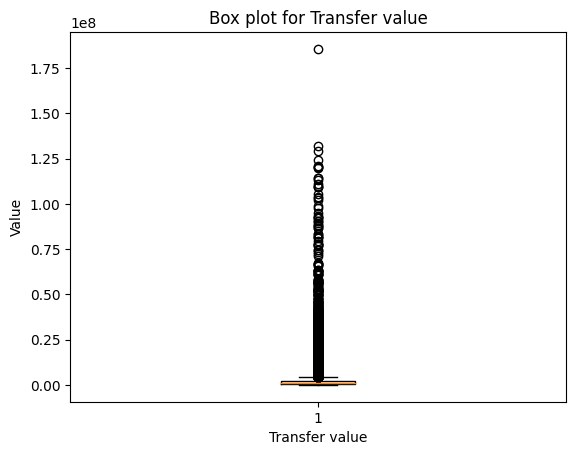

In [14]:
plt.boxplot(final_df['int_value'])

# add labels and title
plt.xlabel('Transfer value')
plt.ylabel('Value')
plt.title('Box plot for Transfer value')

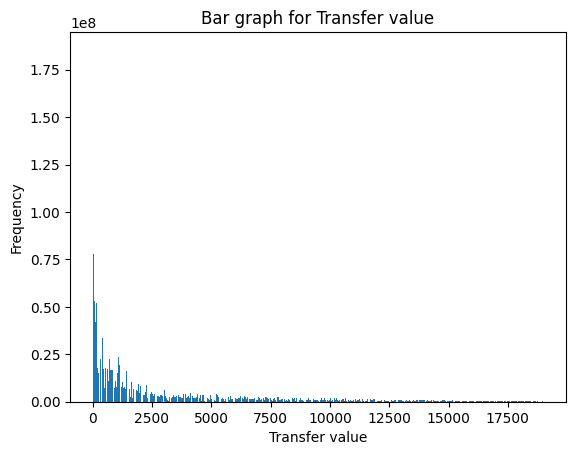

In [15]:
plt.bar(final_df.index, final_df['int_value'])

# add labels and title
plt.xlabel('Transfer value')
plt.ylabel('Frequency')
plt.title('Bar graph for Transfer value')

# show the plot
plt.show()

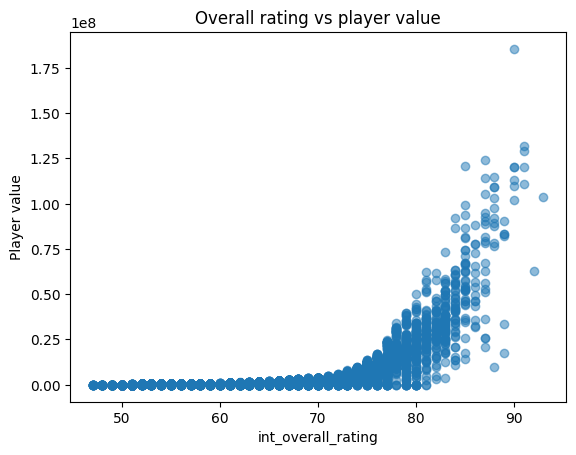

In [16]:
import pandas as pd
import matplotlib.pyplot as plt


# Create a scatter plot of player age vs. potential
plt.scatter(df['int_overall_rating'], df['int_value'], alpha=0.5)
plt.title('Overall rating vs player value')
plt.xlabel('int_overall_rating')
plt.ylabel('Player value')
plt.show()


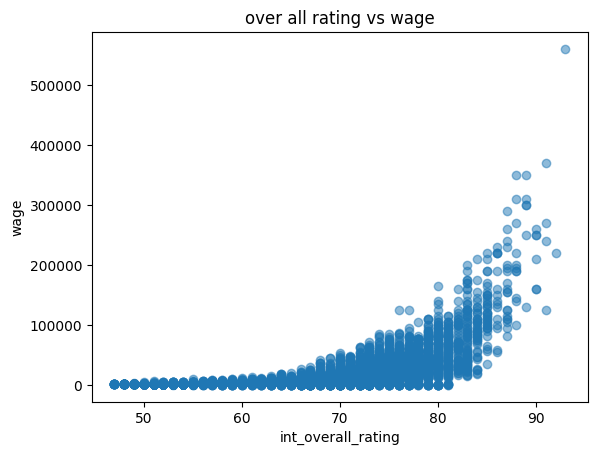

In [17]:
plt.scatter(df['int_overall_rating'], df['int_wage'], alpha=0.5)
plt.title('over all rating vs wage')
plt.xlabel('int_overall_rating')
plt.ylabel('wage')
plt.show()

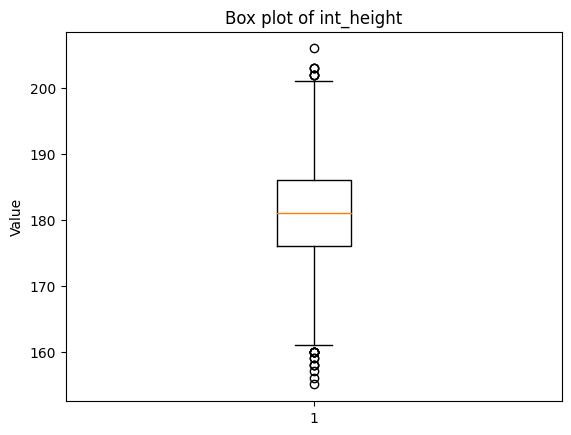

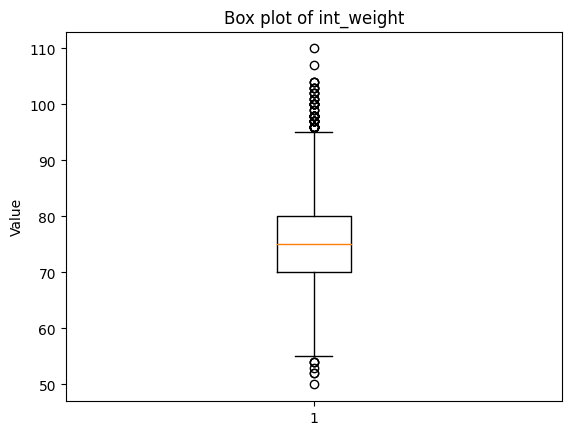

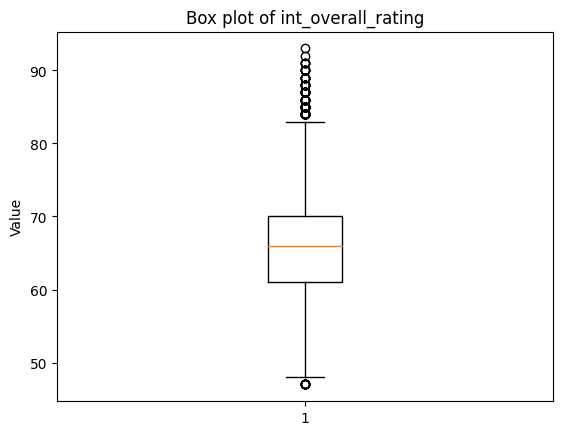

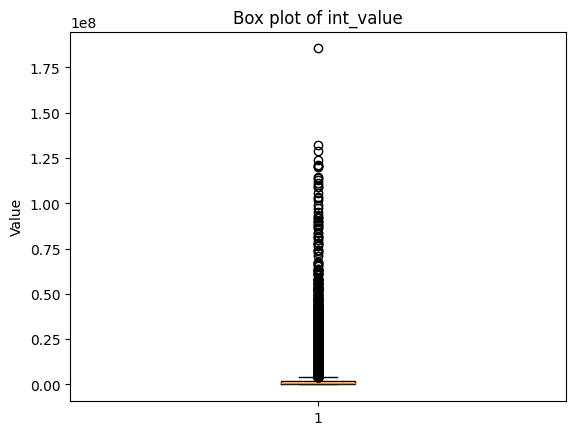

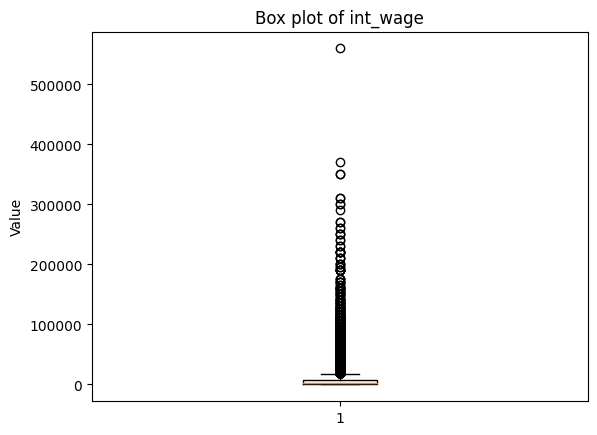

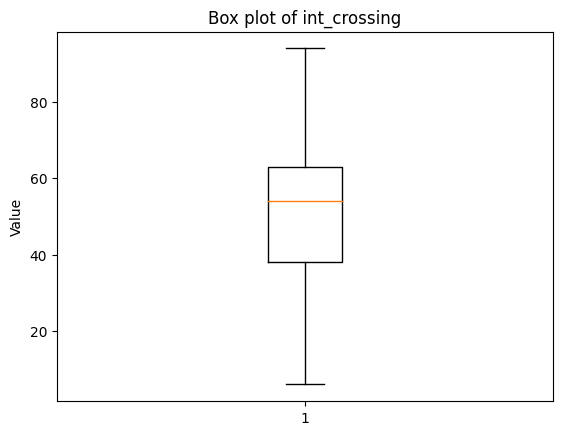

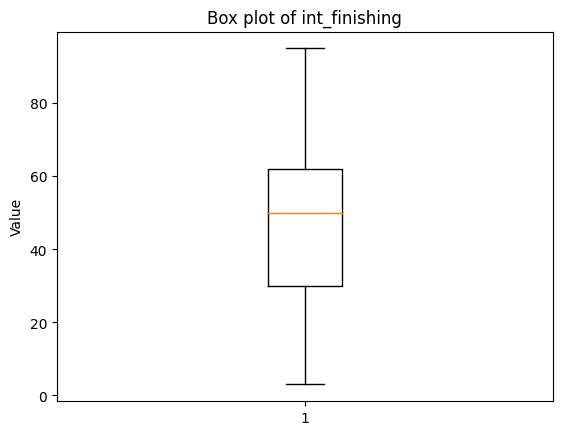

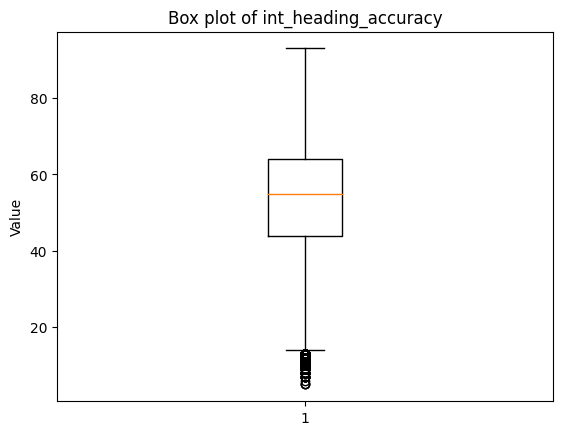

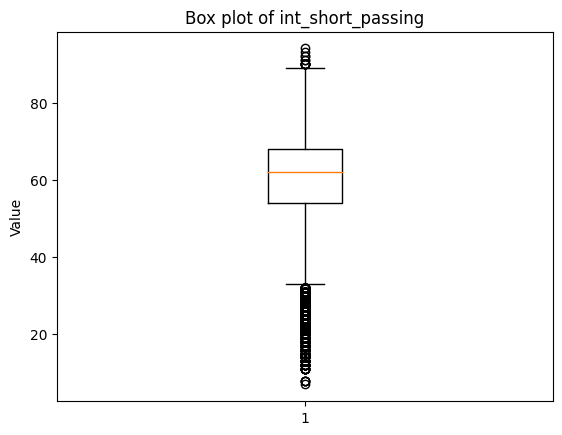

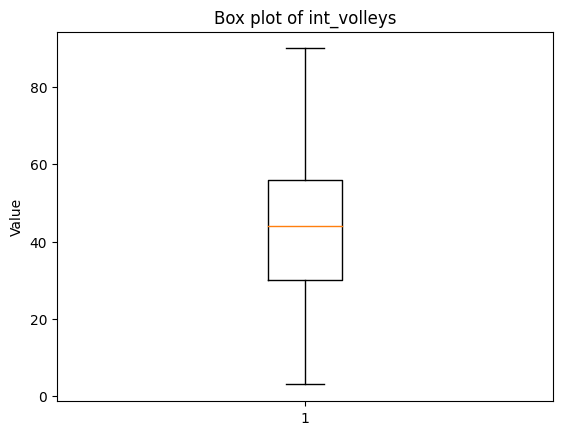

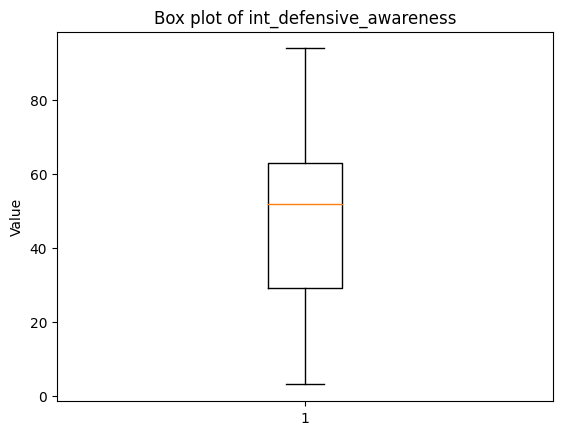

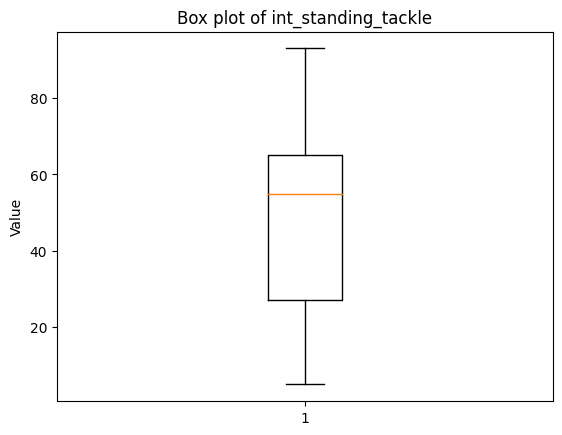

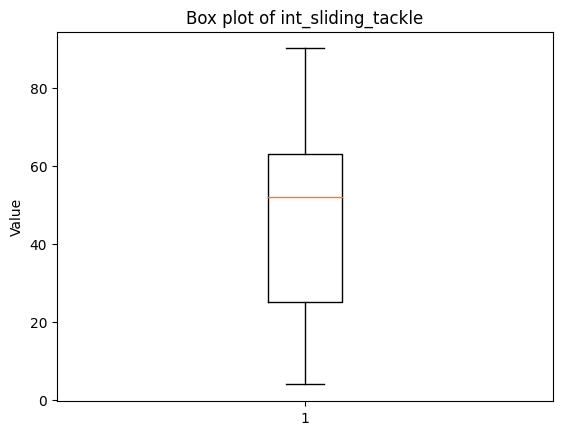

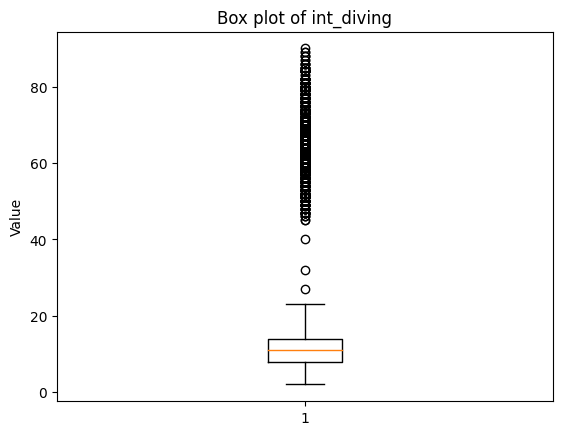

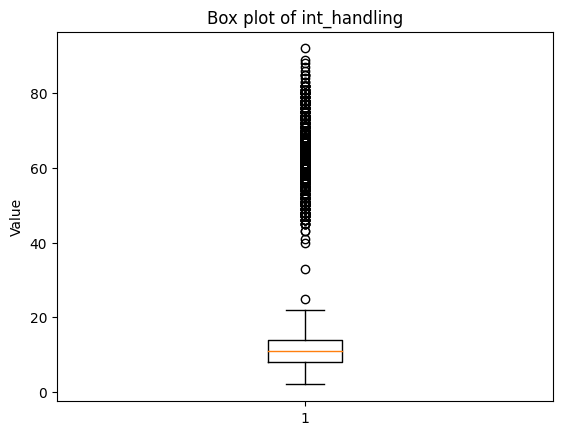

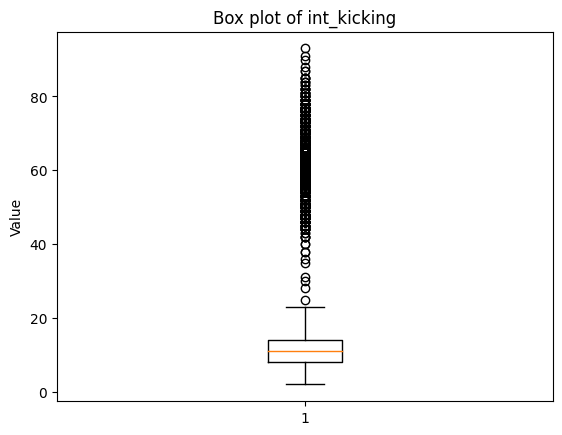

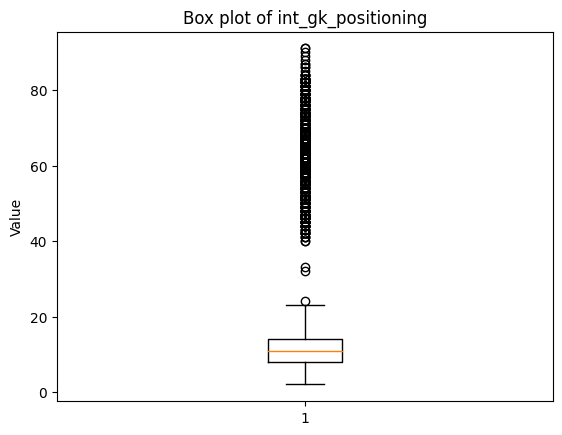

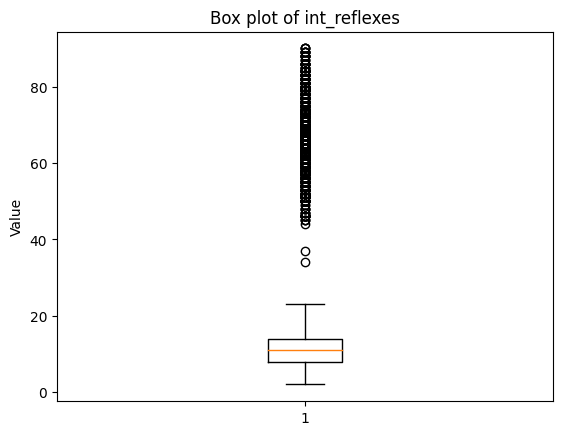

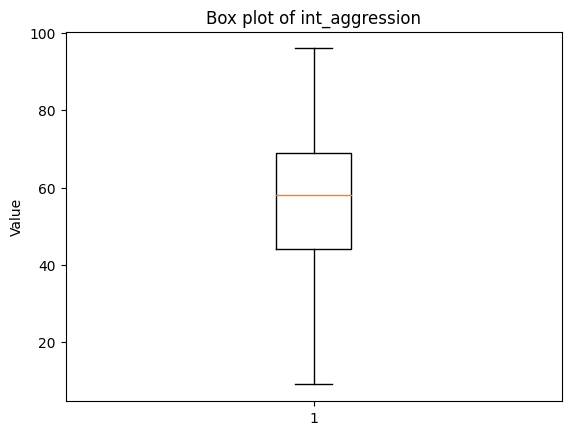

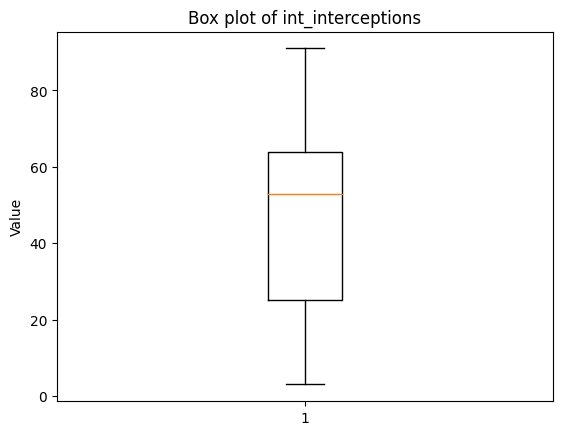

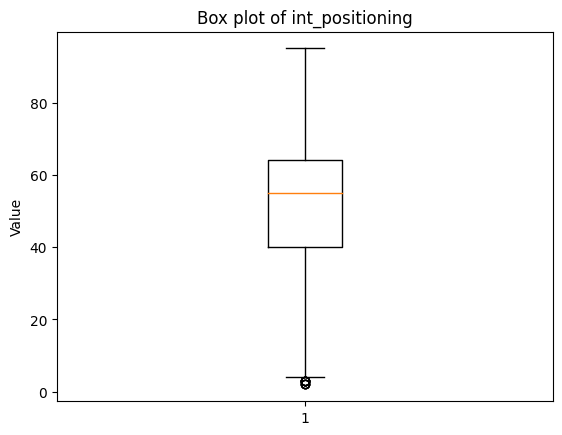

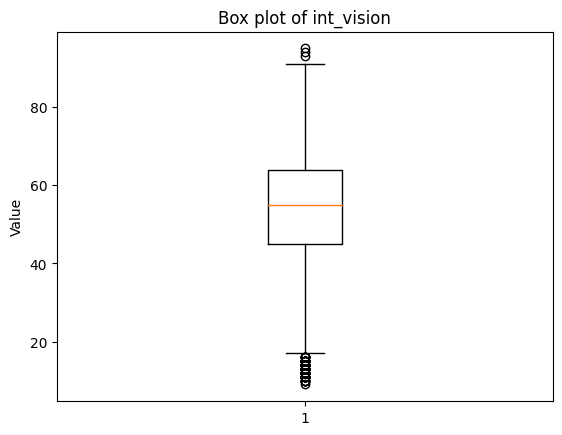

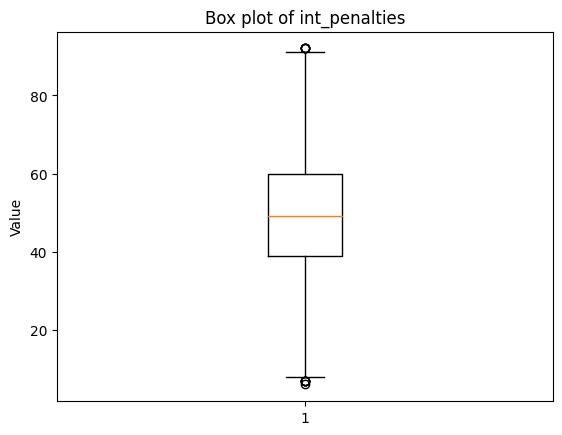

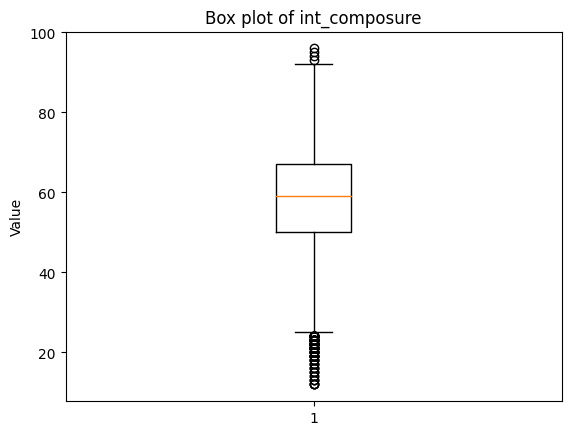

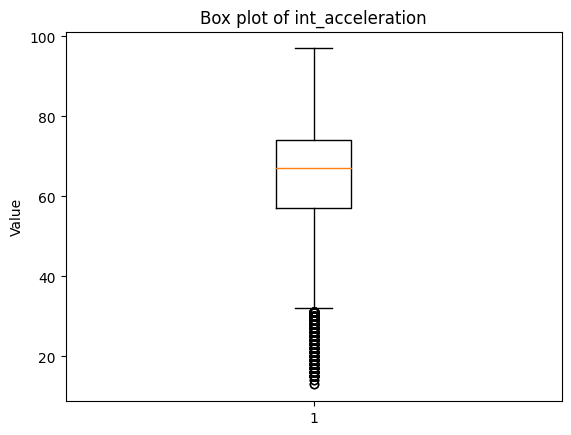

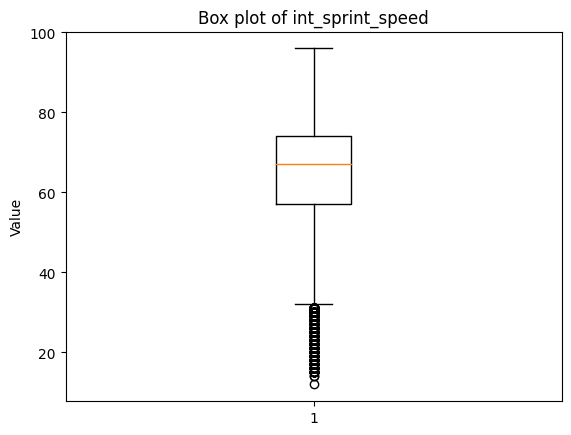

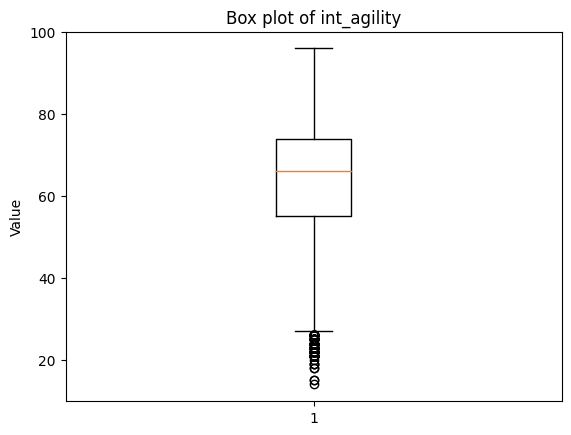

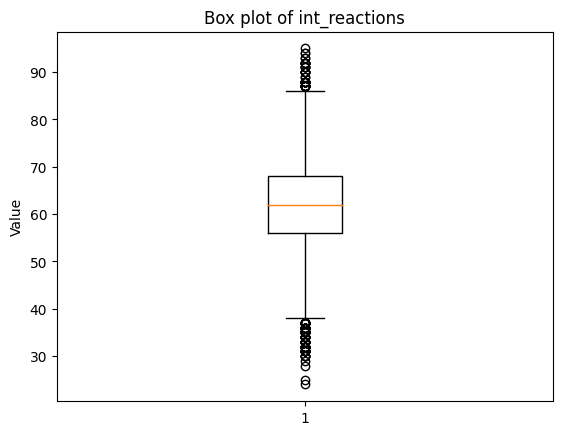

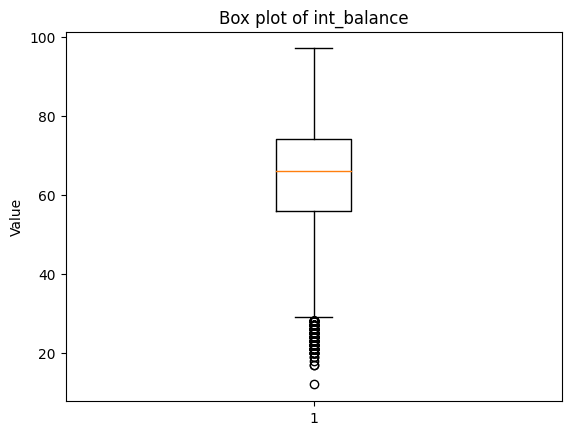

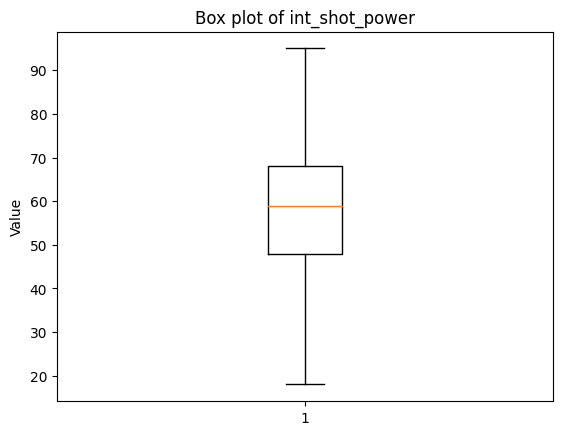

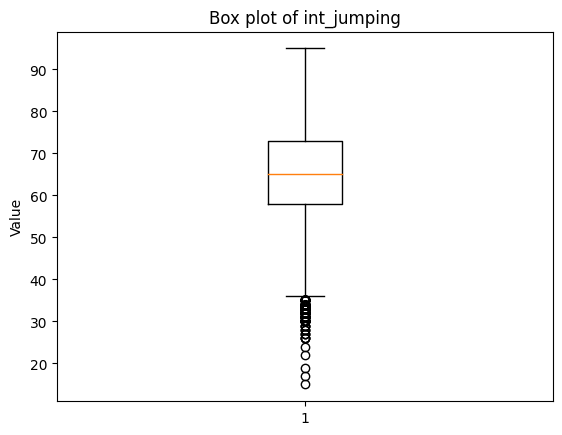

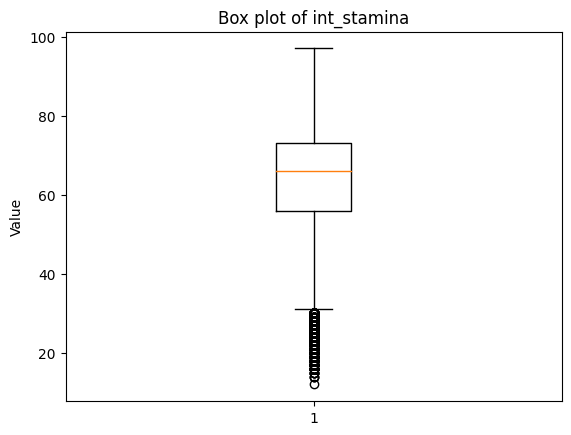

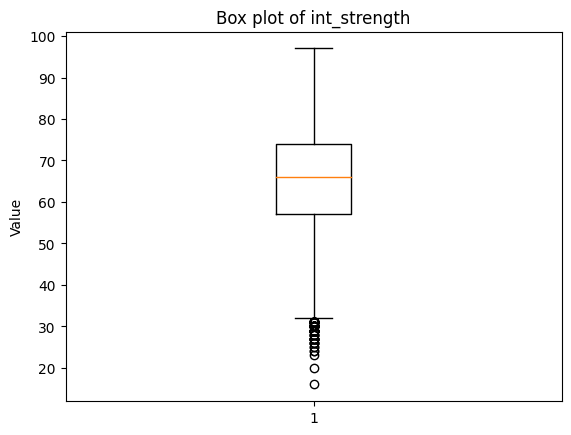

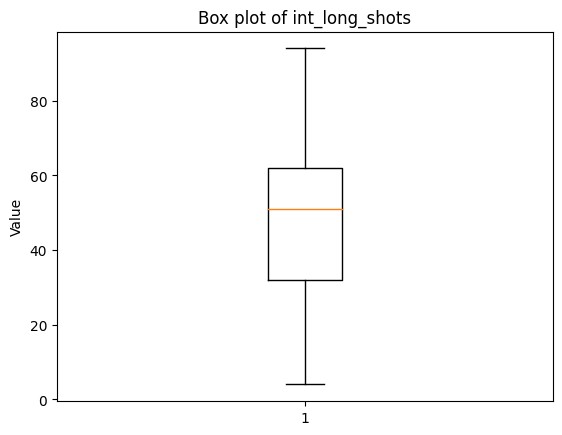

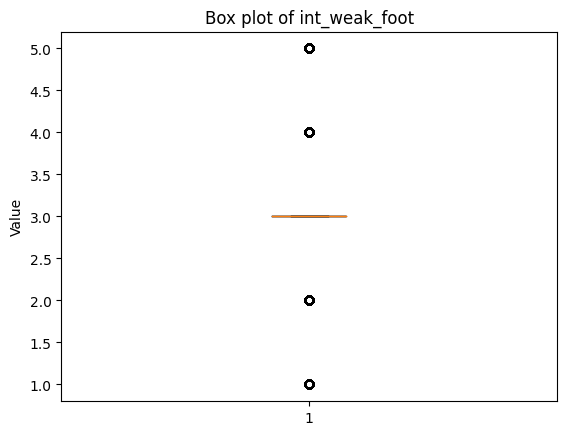

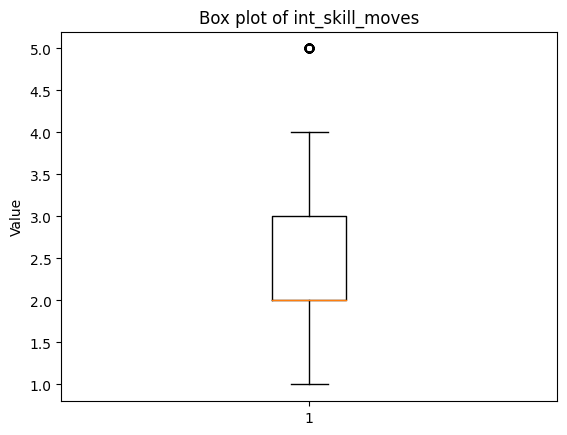

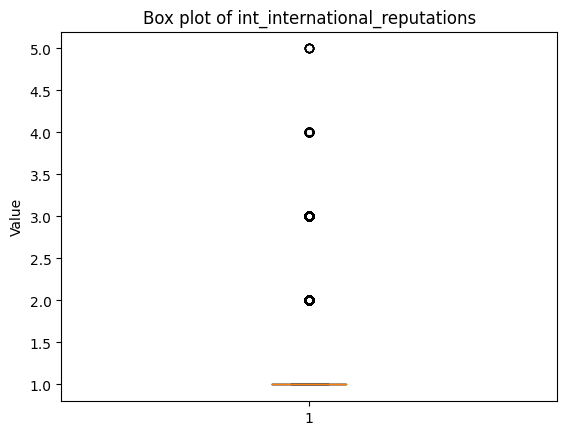

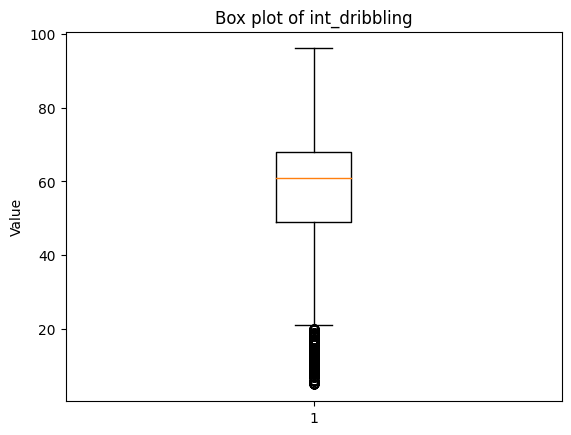

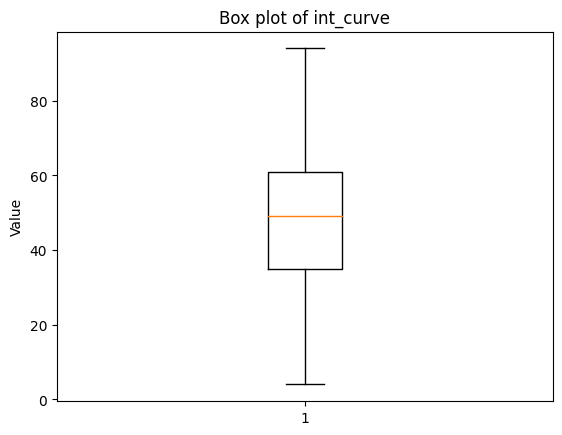

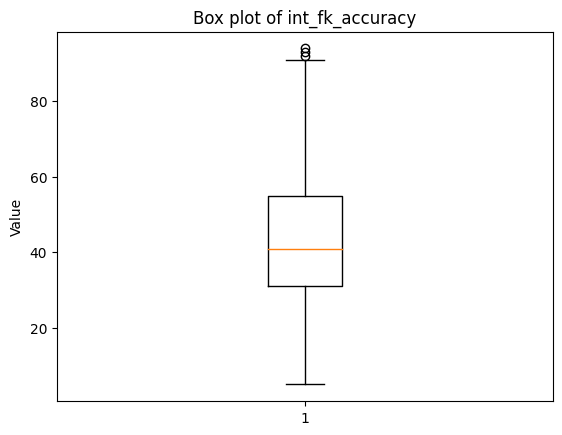

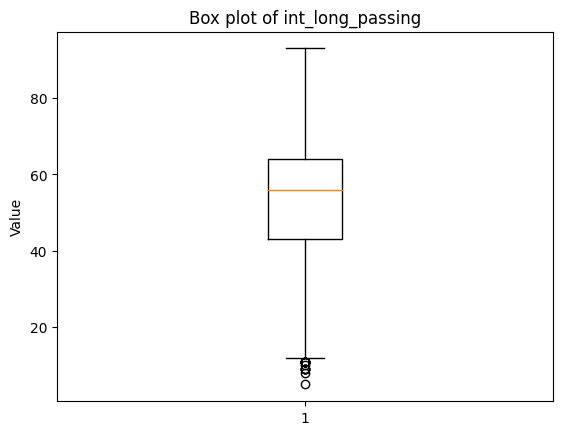

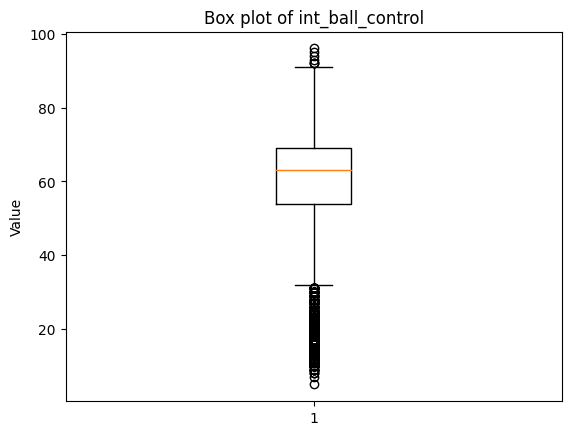

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# identify the categorical and continuous variables
categorical_vars = []
continuous_vars = []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_vars.append(column)
    else:
        continuous_vars.append(column)

# create box plots for the continuous variables
for column in continuous_vars:
    plt.boxplot(df[column])
    plt.ylabel('Value')
    plt.title(f'Box plot of {column}')
    plt.show()


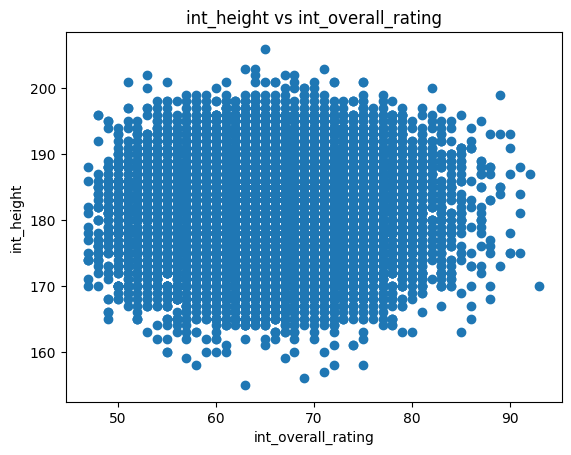

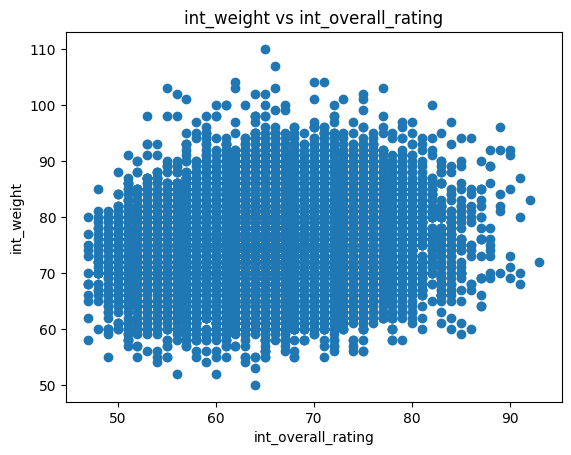

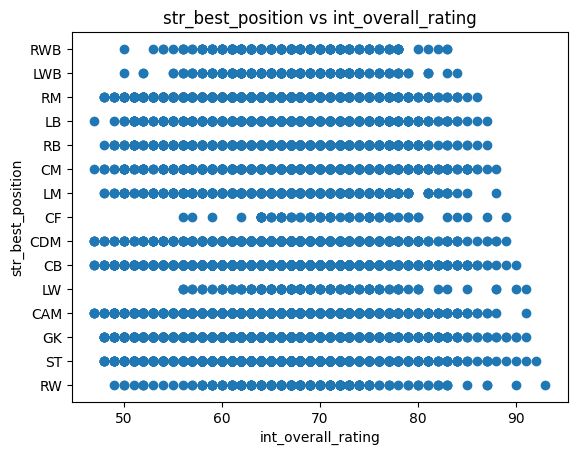

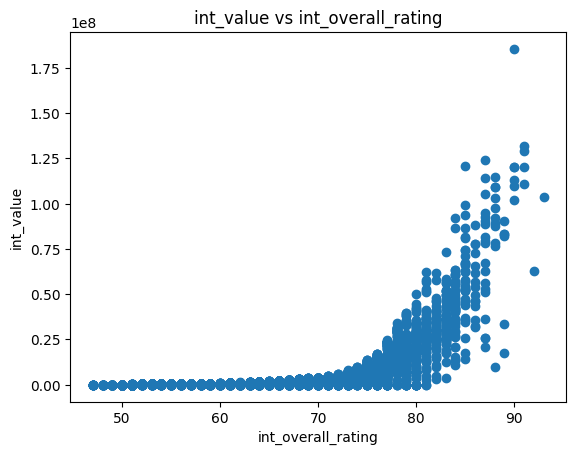

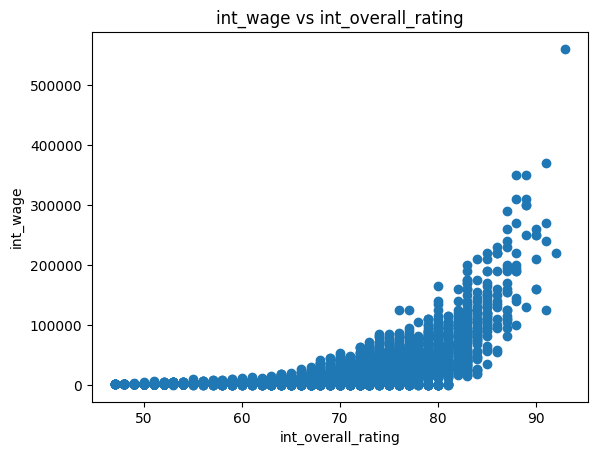

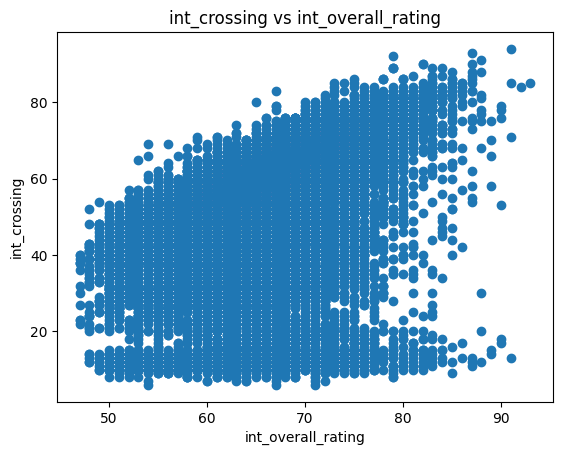

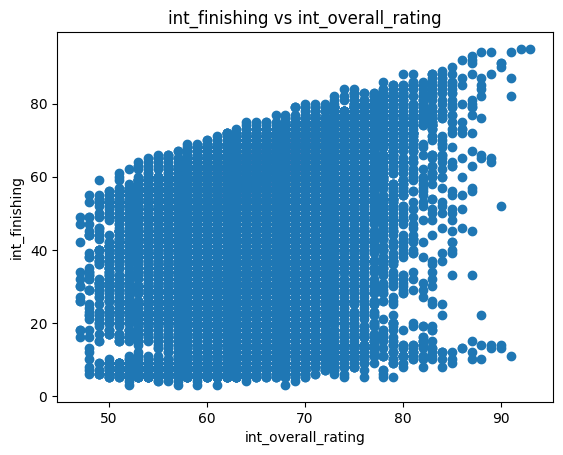

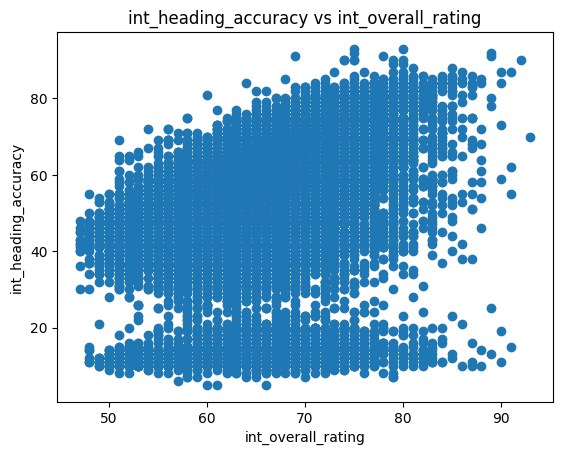

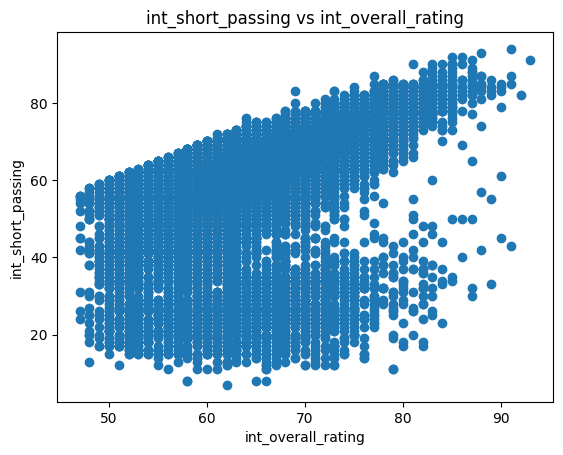

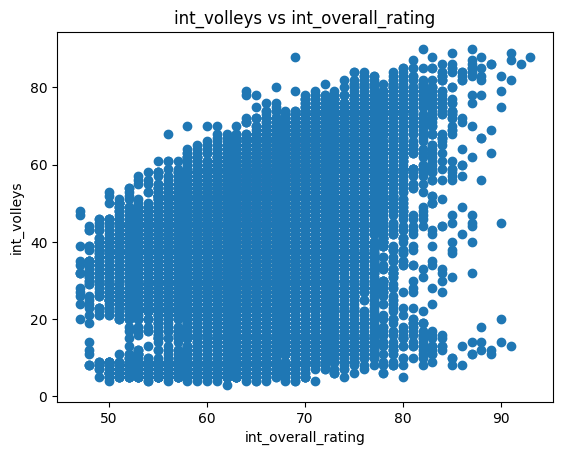

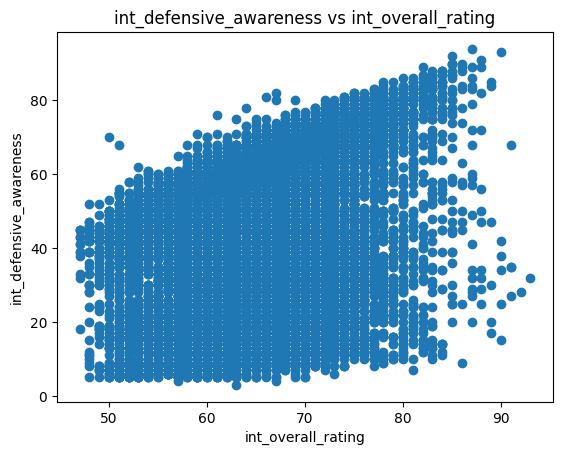

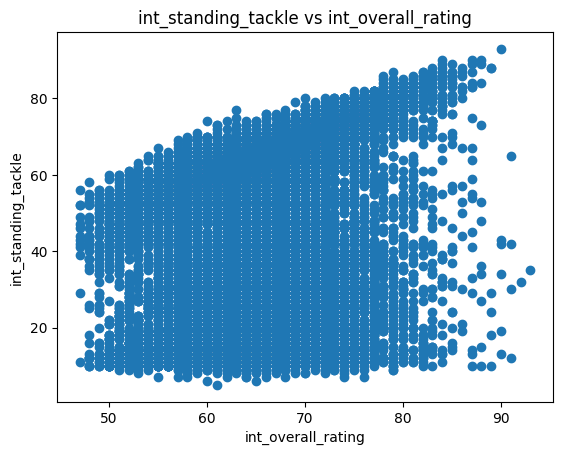

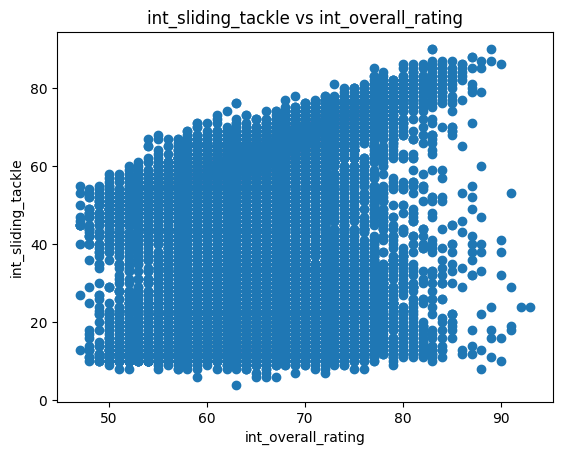

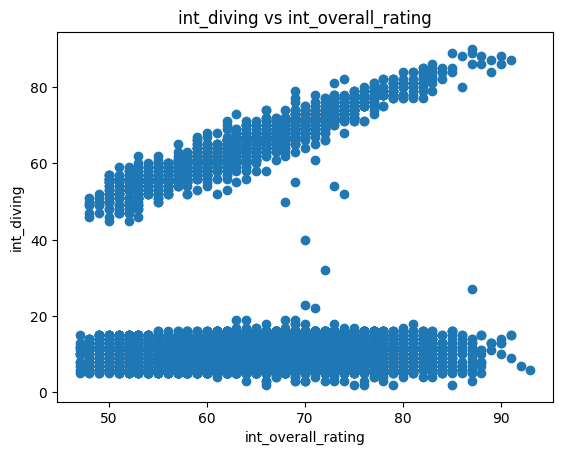

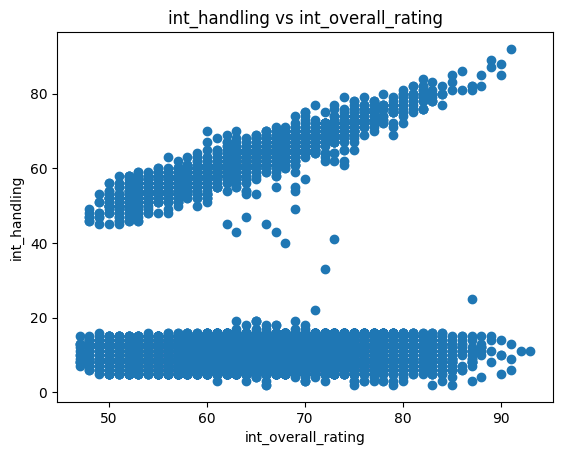

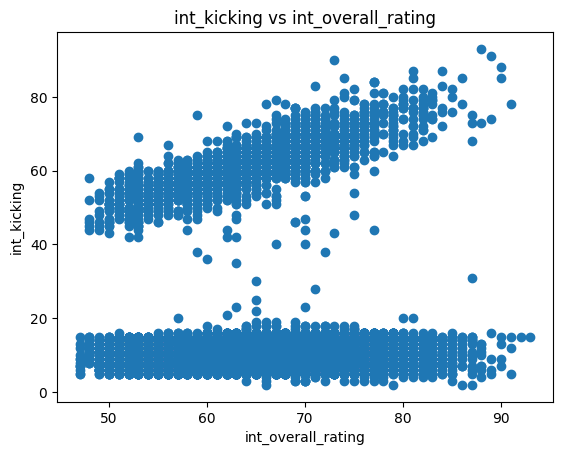

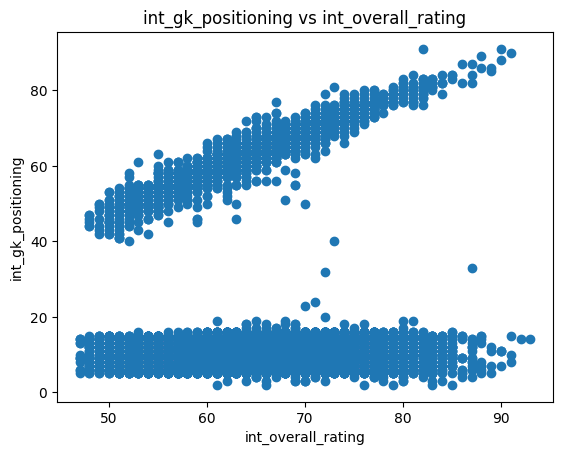

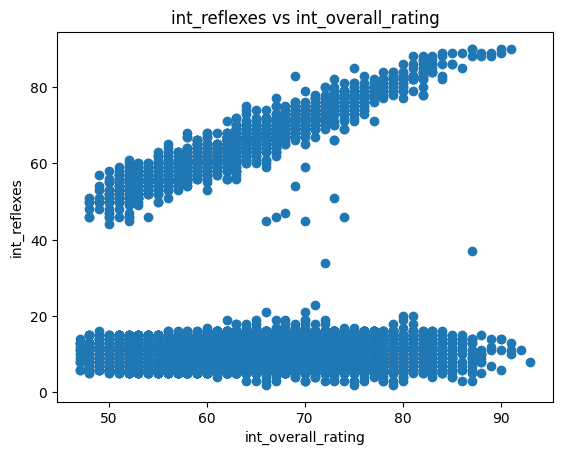

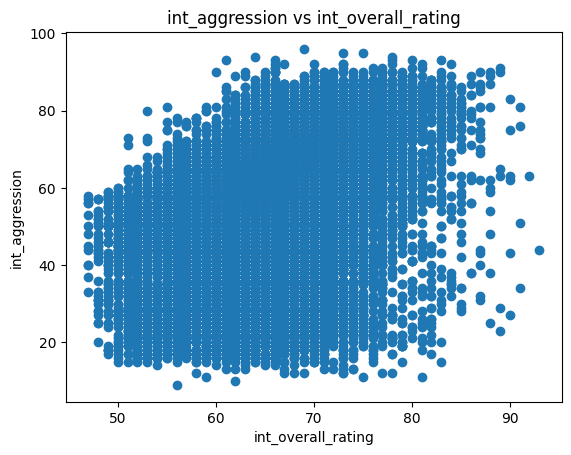

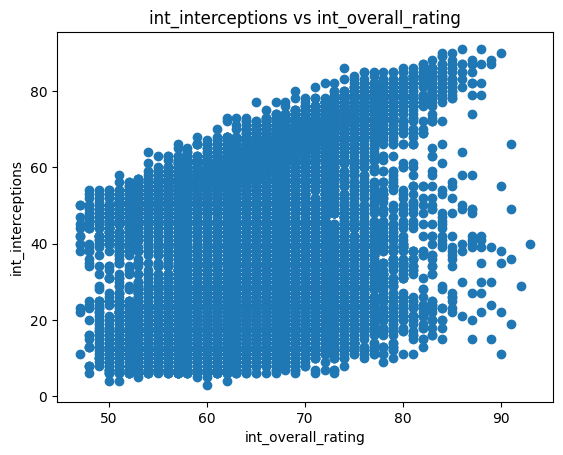

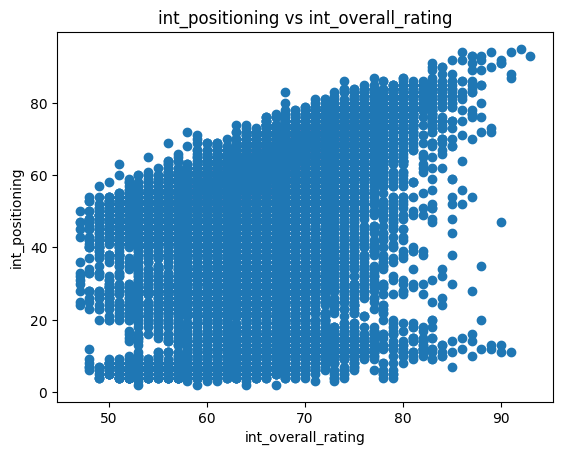

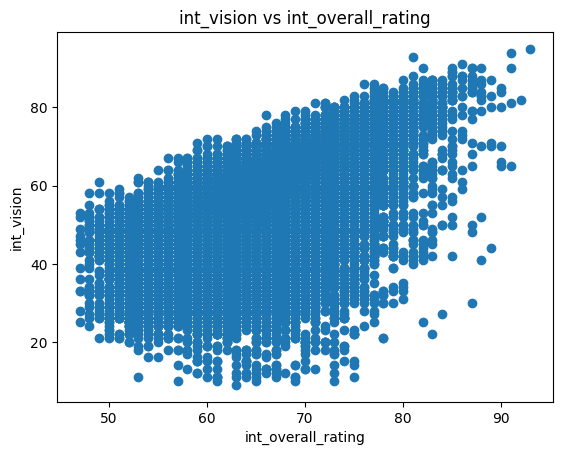

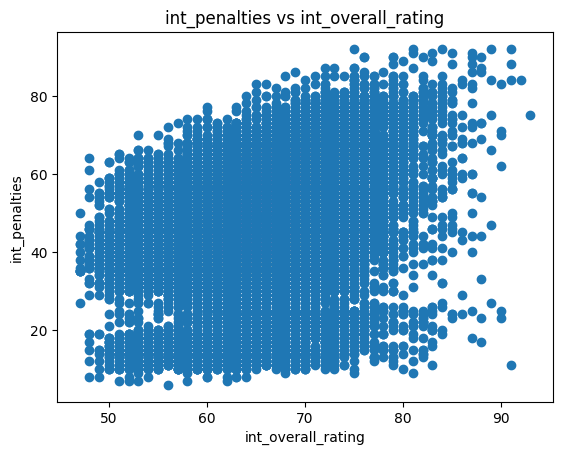

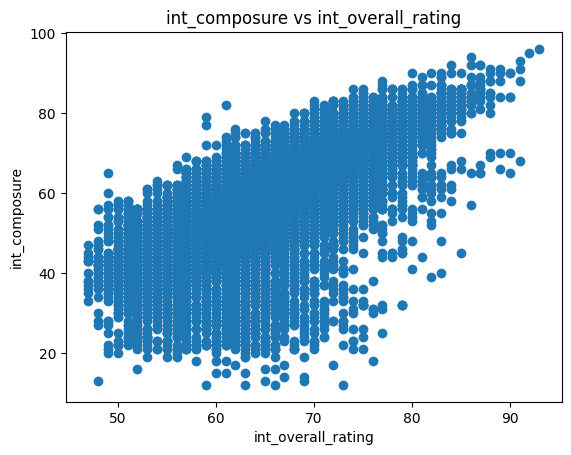

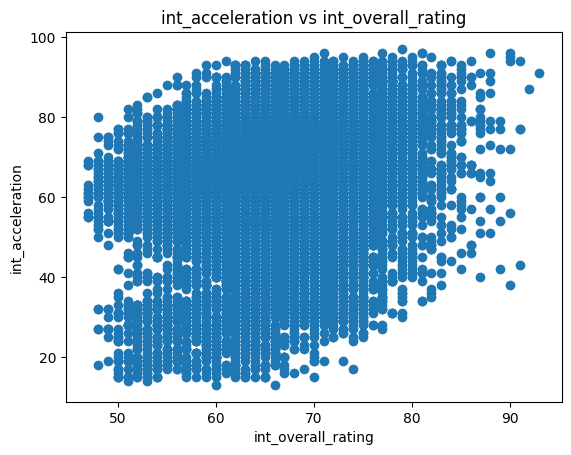

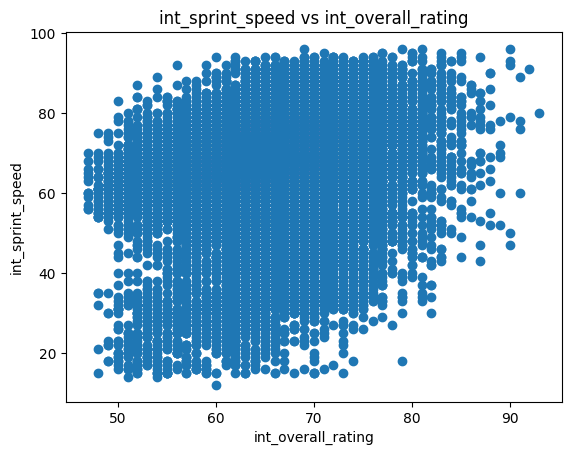

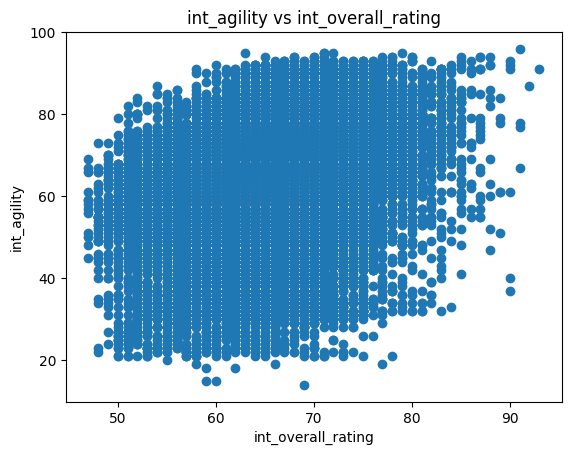

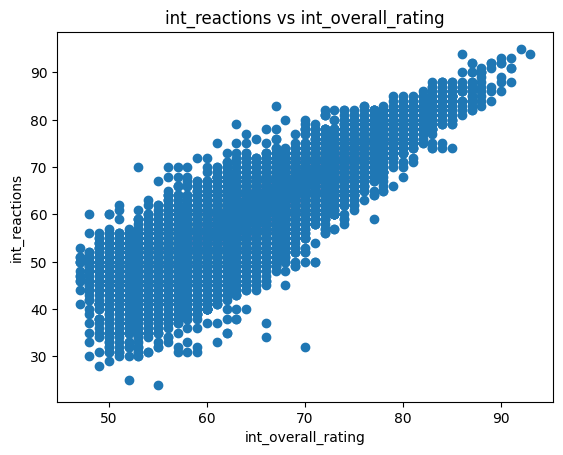

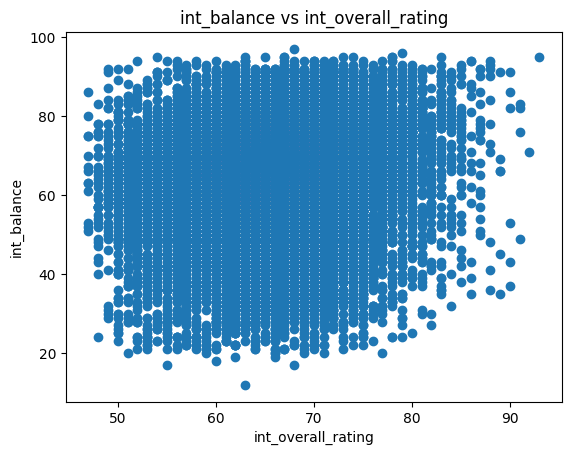

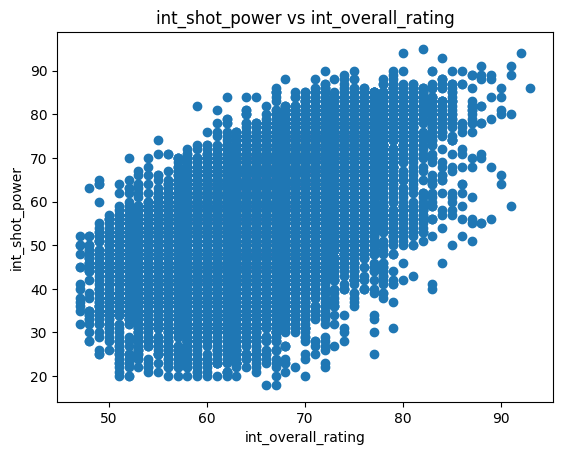

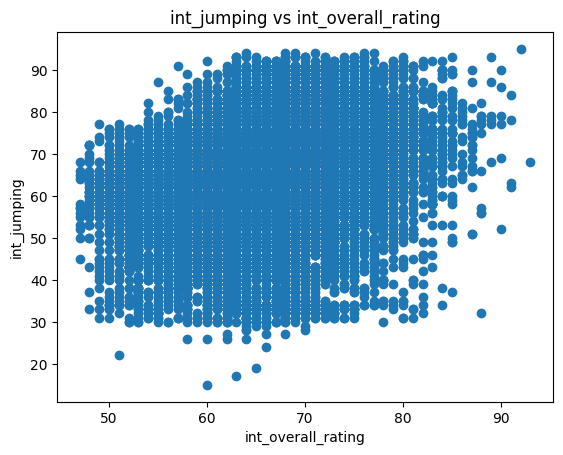

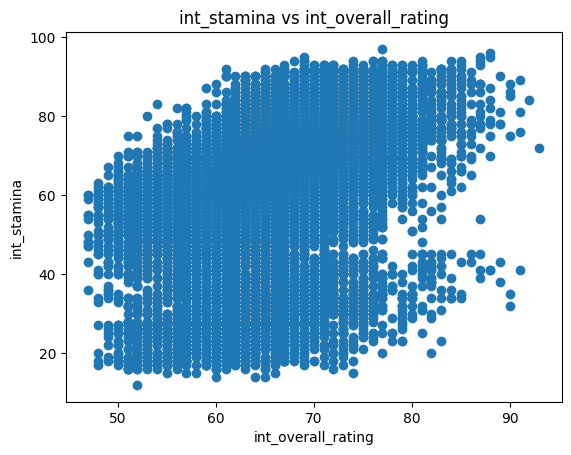

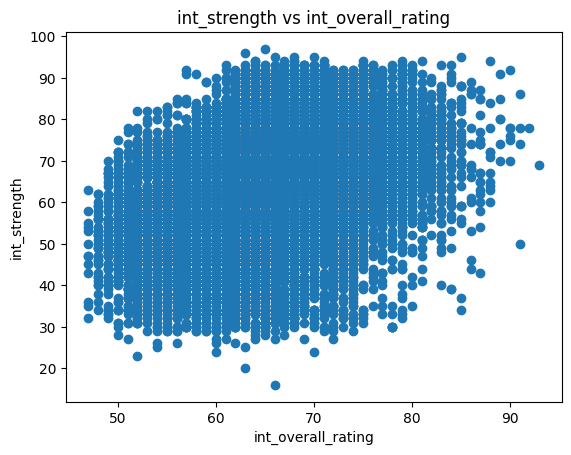

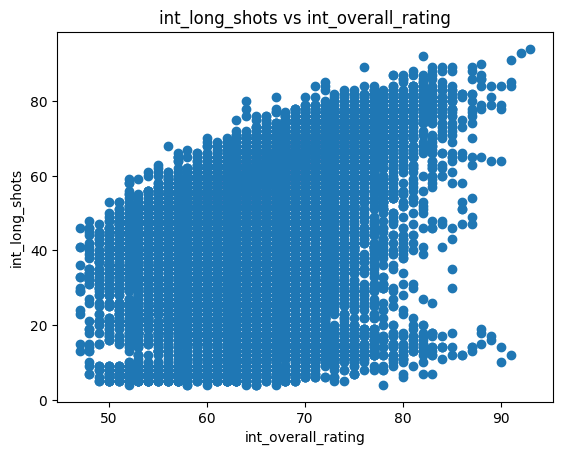

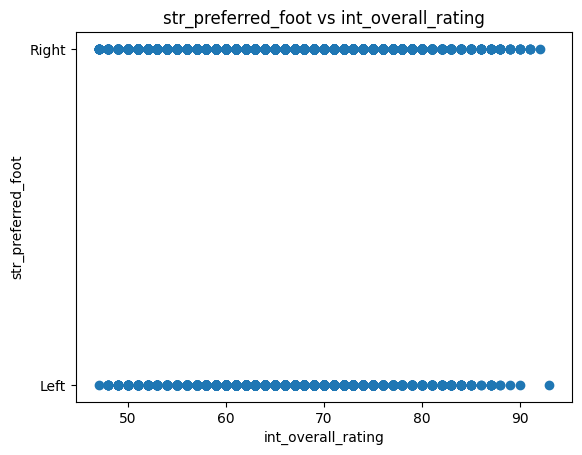

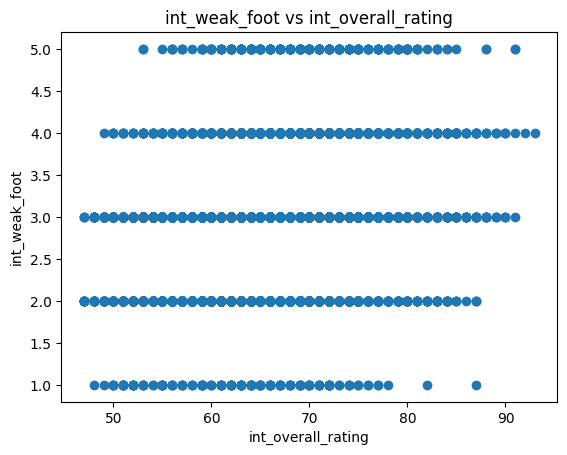

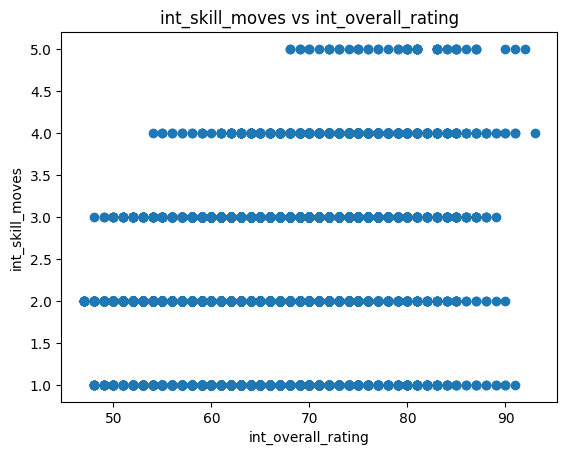

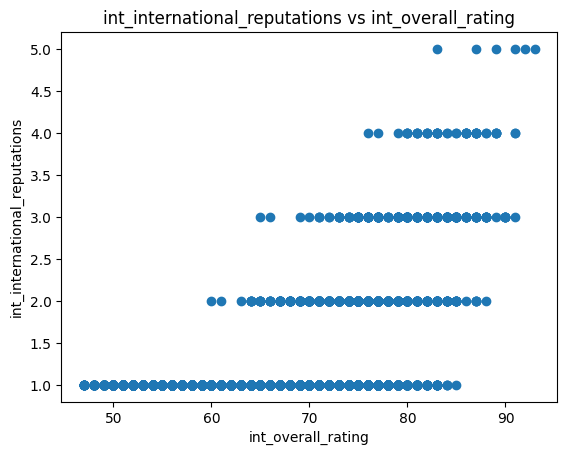

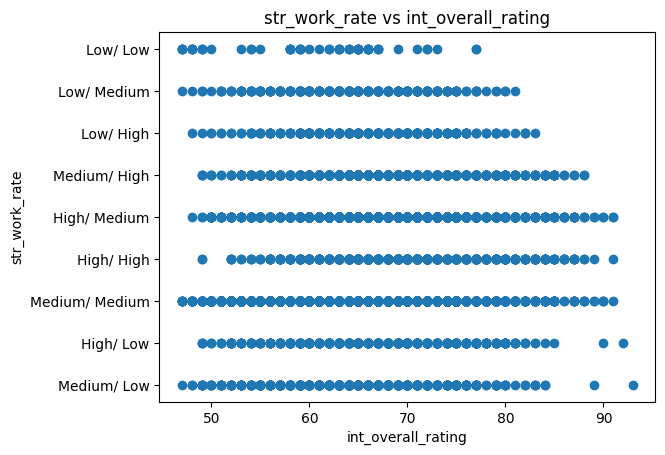

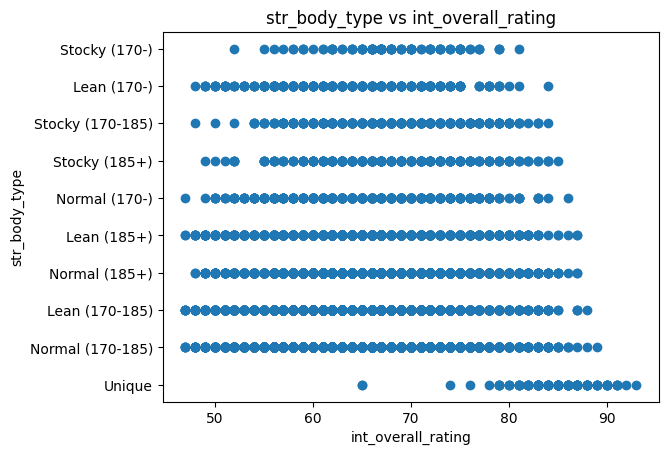

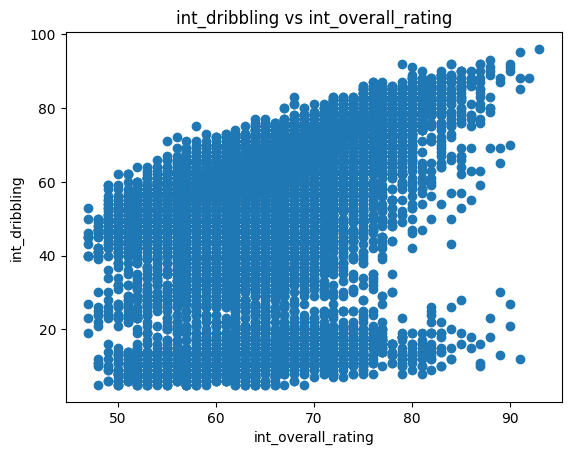

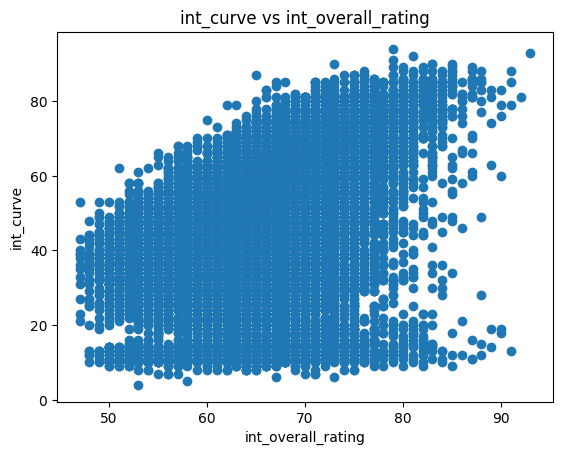

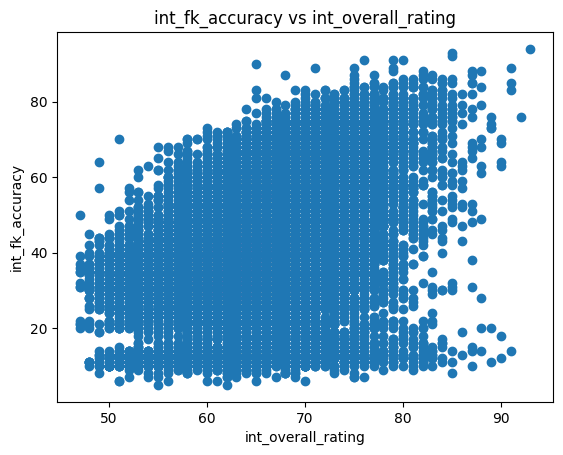

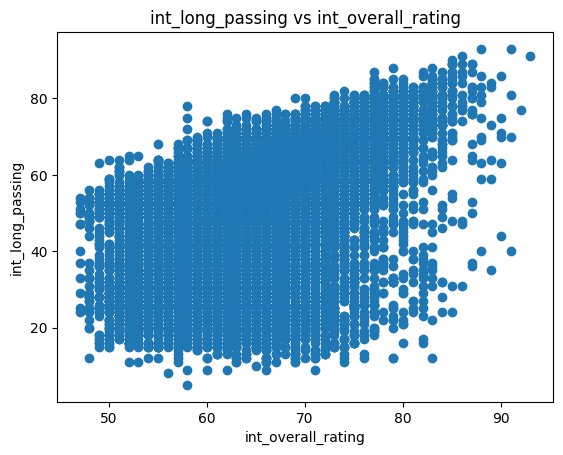

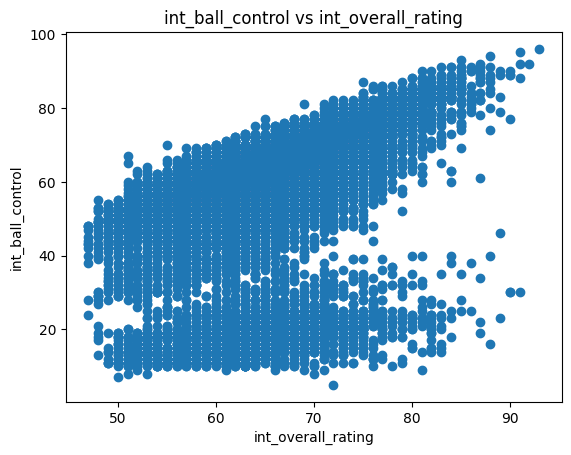

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# select the column to plot against all others
target_column = 'int_overall_rating'

# iterate over all columns and create scatter plots
for column in df_players.columns:
    if column != target_column:
        plt.scatter(df[target_column], df[column])
        plt.xlabel(target_column)
        plt.ylabel(column)
        plt.title(f"{column} vs {target_column}")
        plt.show()

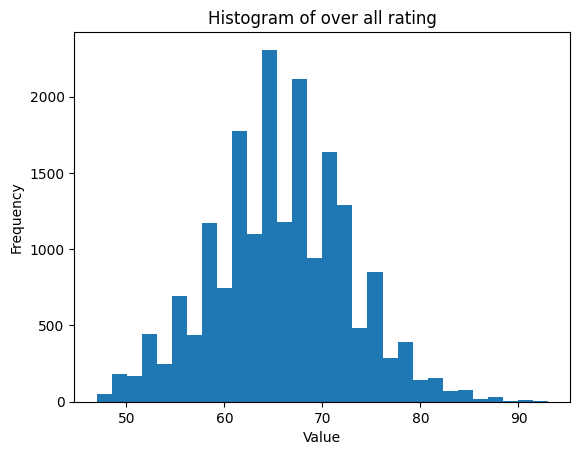

In [20]:
# Create a histogram of the data
plt.hist(df['int_overall_rating'], bins=30)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of over all rating')

plt.show()

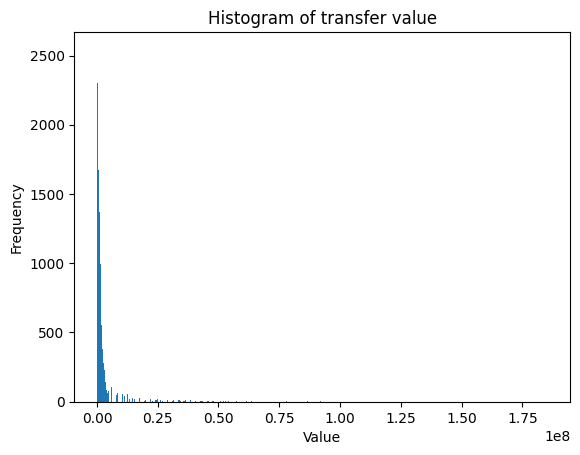

In [21]:
# Create a histogram of the data
plt.hist(df['int_value'], bins=1000)

# Add labels and title
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of transfer value')

plt.show()

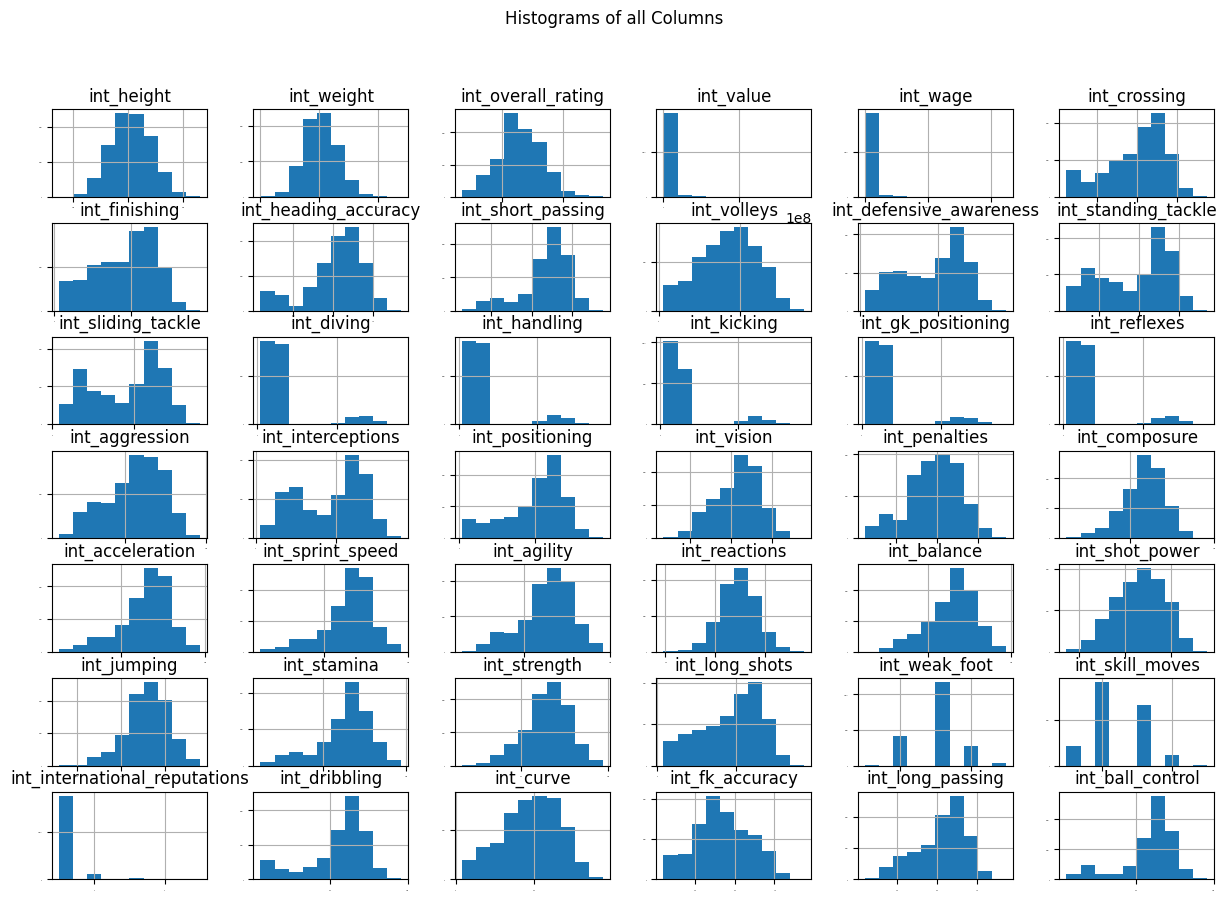

In [22]:
df.hist(figsize=(15, 10),xlabelsize=0, ylabelsize=0)

# Add labels and title
plt.suptitle('Histograms of all Columns')
plt.show()

# Checking for Multicollinearity

In [23]:
# correlation matrix for the modified dataframe

final_df.corr()

int_height  int_weight  int_overall_rating  \
int_height                        1.000000    0.772728            0.033578   
int_weight                        0.772728    1.000000            0.142963   
int_overall_rating                0.033578    0.142963            1.000000   
int_value                         0.004337    0.032207            0.555632   
int_wage                          0.023442    0.061778            0.590335   
...                                    ...         ...                 ...   
str_body_type_Normal (185+)       0.568547    0.518653            0.036085   
str_body_type_Stocky (170-)      -0.141617   -0.068170            0.023723   
str_body_type_Stocky (170-185)   -0.076442    0.057567            0.048943   
str_body_type_Stocky (185+)       0.152570    0.213242            0.036930   
str_body_type_Unique              0.011608    0.023137            0.215546   

                                int_value  int_wage  int_crossing  \
int_height                       0.004337  0.023442     -0.488400   
int_weight                       0.032207  0.061778     -0.399702   
int_overall_rating               0.555632  0.590335      0.407489   
int_value                        1.000000  0.814639      0.228500   
int_wage                         0.814639  1.000000      0.252983   
...                                   ...       ...           ...   
str_body_type_Normal (185+)     -0.033716 -0.017924     -0.387195   
str_body_type_Stocky (170-)     -0.001041 -0.001501      0.048844   
str_body_type_Stocky (170-185)   0.000824  0.004748      0.045926   
str_body_type_Stocky (185+)      0.009589  0.011421     -0.081441   
str_body_type_Unique             0.577829  0.545163      0.075452   

                                int_finishing  int_heading_accuracy  \
int_height                          -0.374418              0.012797   
int_weight                          -0.289110              0.043845   
int_overall_rating                   0.323294              0.324860   
int_value                            0.211812              0.155850   
int_wage                             0.223714              0.198691   
...                                       ...                   ...   
str_body_type_Normal (185+)         -0.300085             -0.056826   
str_body_type_Stocky (170-)          0.037348             -0.009901   
str_body_type_Stocky (170-185)       0.059566              0.050000   
str_body_type_Stocky (185+)         -0.038541              0.050765   
str_body_type_Unique                 0.081924              0.055321   

                                int_short_passing  int_volleys  ...  \
int_height                              -0.351635    -0.344798  ...   
int_weight                              -0.275273    -0.258363  ...   
int_overall_rating                       0.500764     0.371456  ...   
int_value                                0.291509     0.234745  ...   
int_wage                                 0.316714     0.258506  ...   
...                                           ...          ...  ...   
str_body_type_Normal (185+)             -0.286202    -0.279718  ...   
str_body_type_Stocky (170-)              0.035216     0.038062  ...   
str_body_type_Stocky (170-185)           0.043482     0.068743  ...   
str_body_type_Stocky (185+)             -0.046923    -0.033822  ...   
str_body_type_Unique                     0.099159     0.094787  ...   

                                str_body_type_Lean (170-)  \
int_height                                      -0.302610   
int_weight                                      -0.259244   
int_overall_rating                              -0.043604   
int_value                                       -0.022331   
int_wage                                        -0.026653   
...                                                   ...   
str_body_type_Normal (185+)                     -0.082234   
str_body_type_Stocky (170-)                     -0.011539   
str_body_ty

Text(0.5, 1.0, 'Correlation Heatmap')

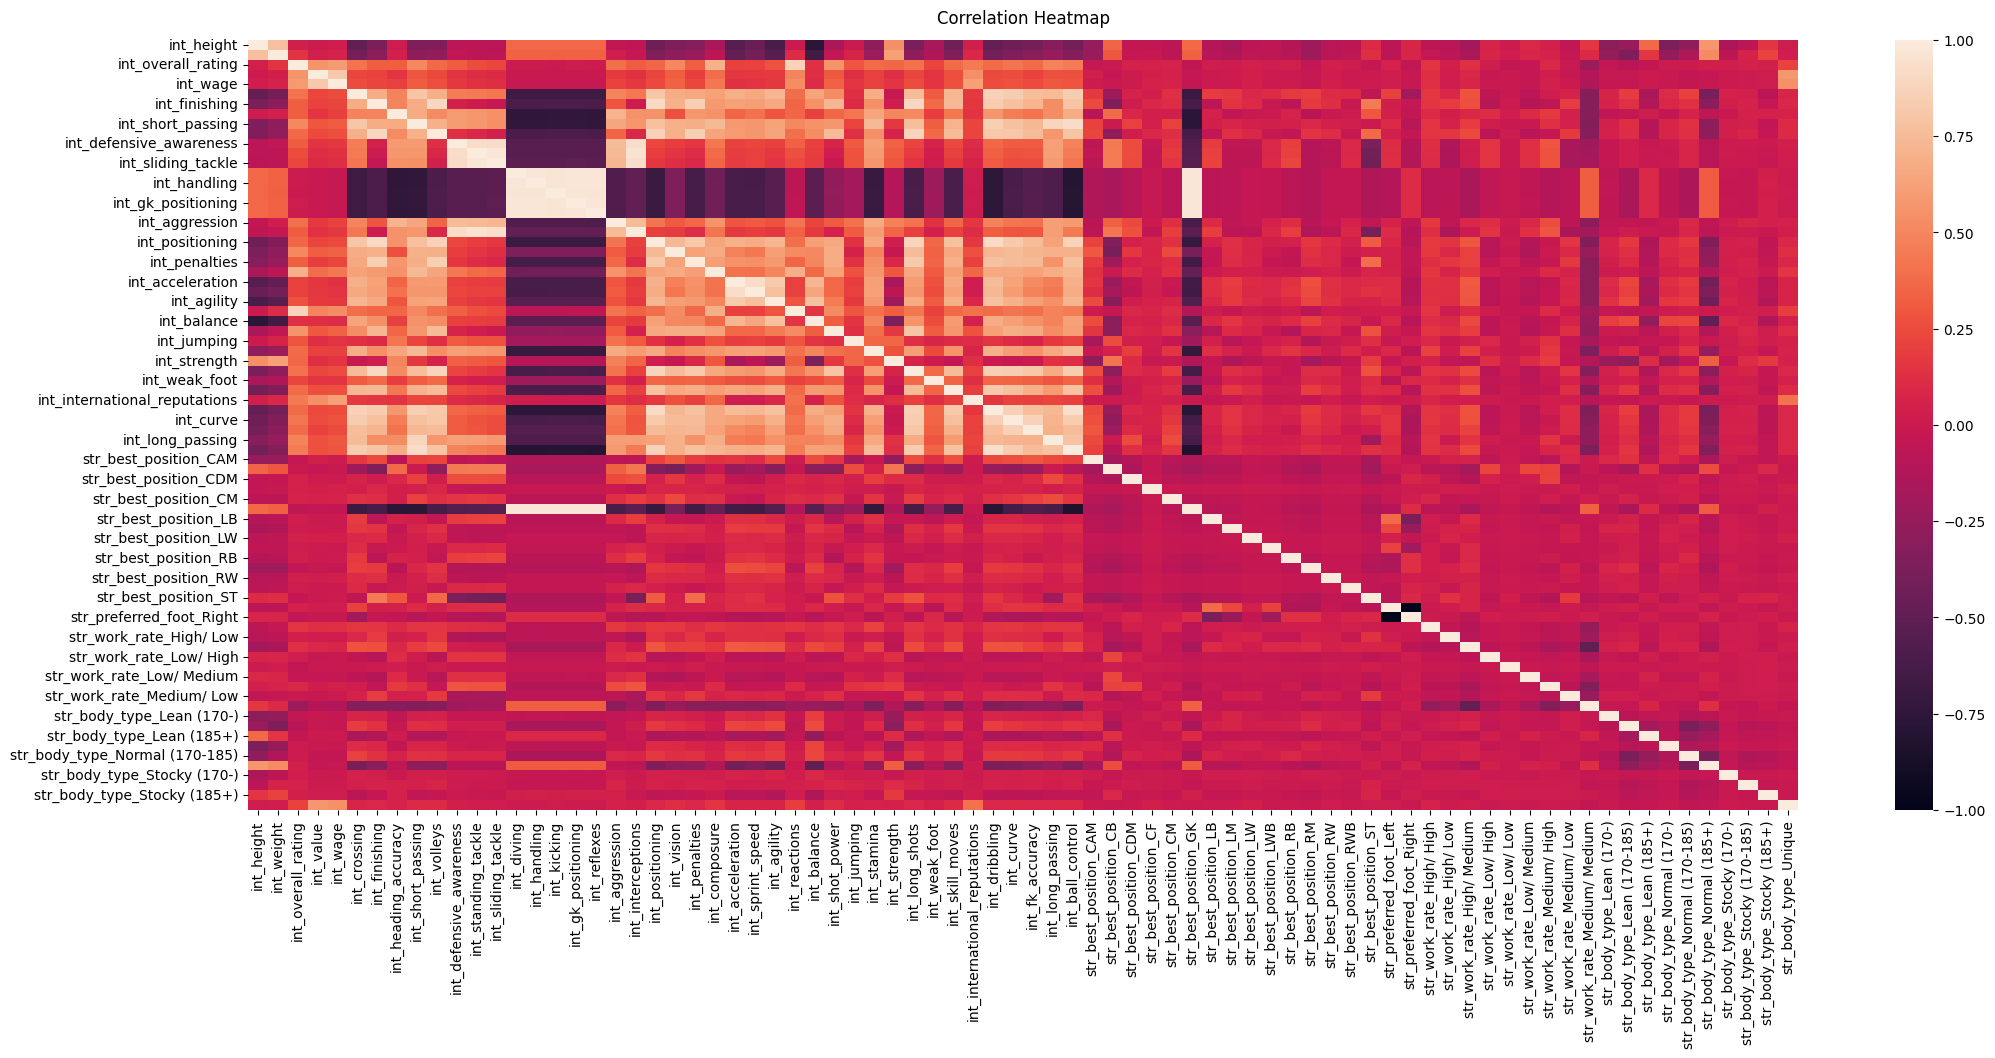

In [24]:
# Correlation heatmap

plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(final_df.corr(), vmin=-1, vmax=1)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [25]:
# checking for features that are highly correlated with target variable

final_df.corr()[['int_overall_rating']].sort_values(by='int_overall_rating', ascending=False)

int_overall_rating
int_overall_rating                      1.000000
int_reactions                           0.867368
int_composure                           0.702441
int_wage                                0.590335
int_shot_power                          0.556646
...                                          ...
str_best_position_RM                   -0.048432
str_preferred_foot_Right               -0.049261
str_best_position_GK                   -0.057645
str_body_type_Lean (170-185)           -0.080069
str_work_rate_Medium/ Medium           -0.221163

[78 rows x 1 columns]

In [54]:
# copying the dataframe in a temperory variable

df_final = final_df

# Modeling


In [40]:

final_df.corr()[['int_value']].sort_values(by='int_value', ascending=False)

int_value
int_value                        1.000000
int_wage                         0.814639
str_body_type_Unique             0.577829
int_overall_rating               0.555632
int_international_reputations    0.534795
...                                   ...
str_work_rate_Low/ Medium       -0.033321
str_body_type_Normal (185+)     -0.033716
str_best_position_GK            -0.035741
str_body_type_Normal (170-185)  -0.041242
str_work_rate_Medium/ Medium    -0.117142

[78 rows x 1 columns]

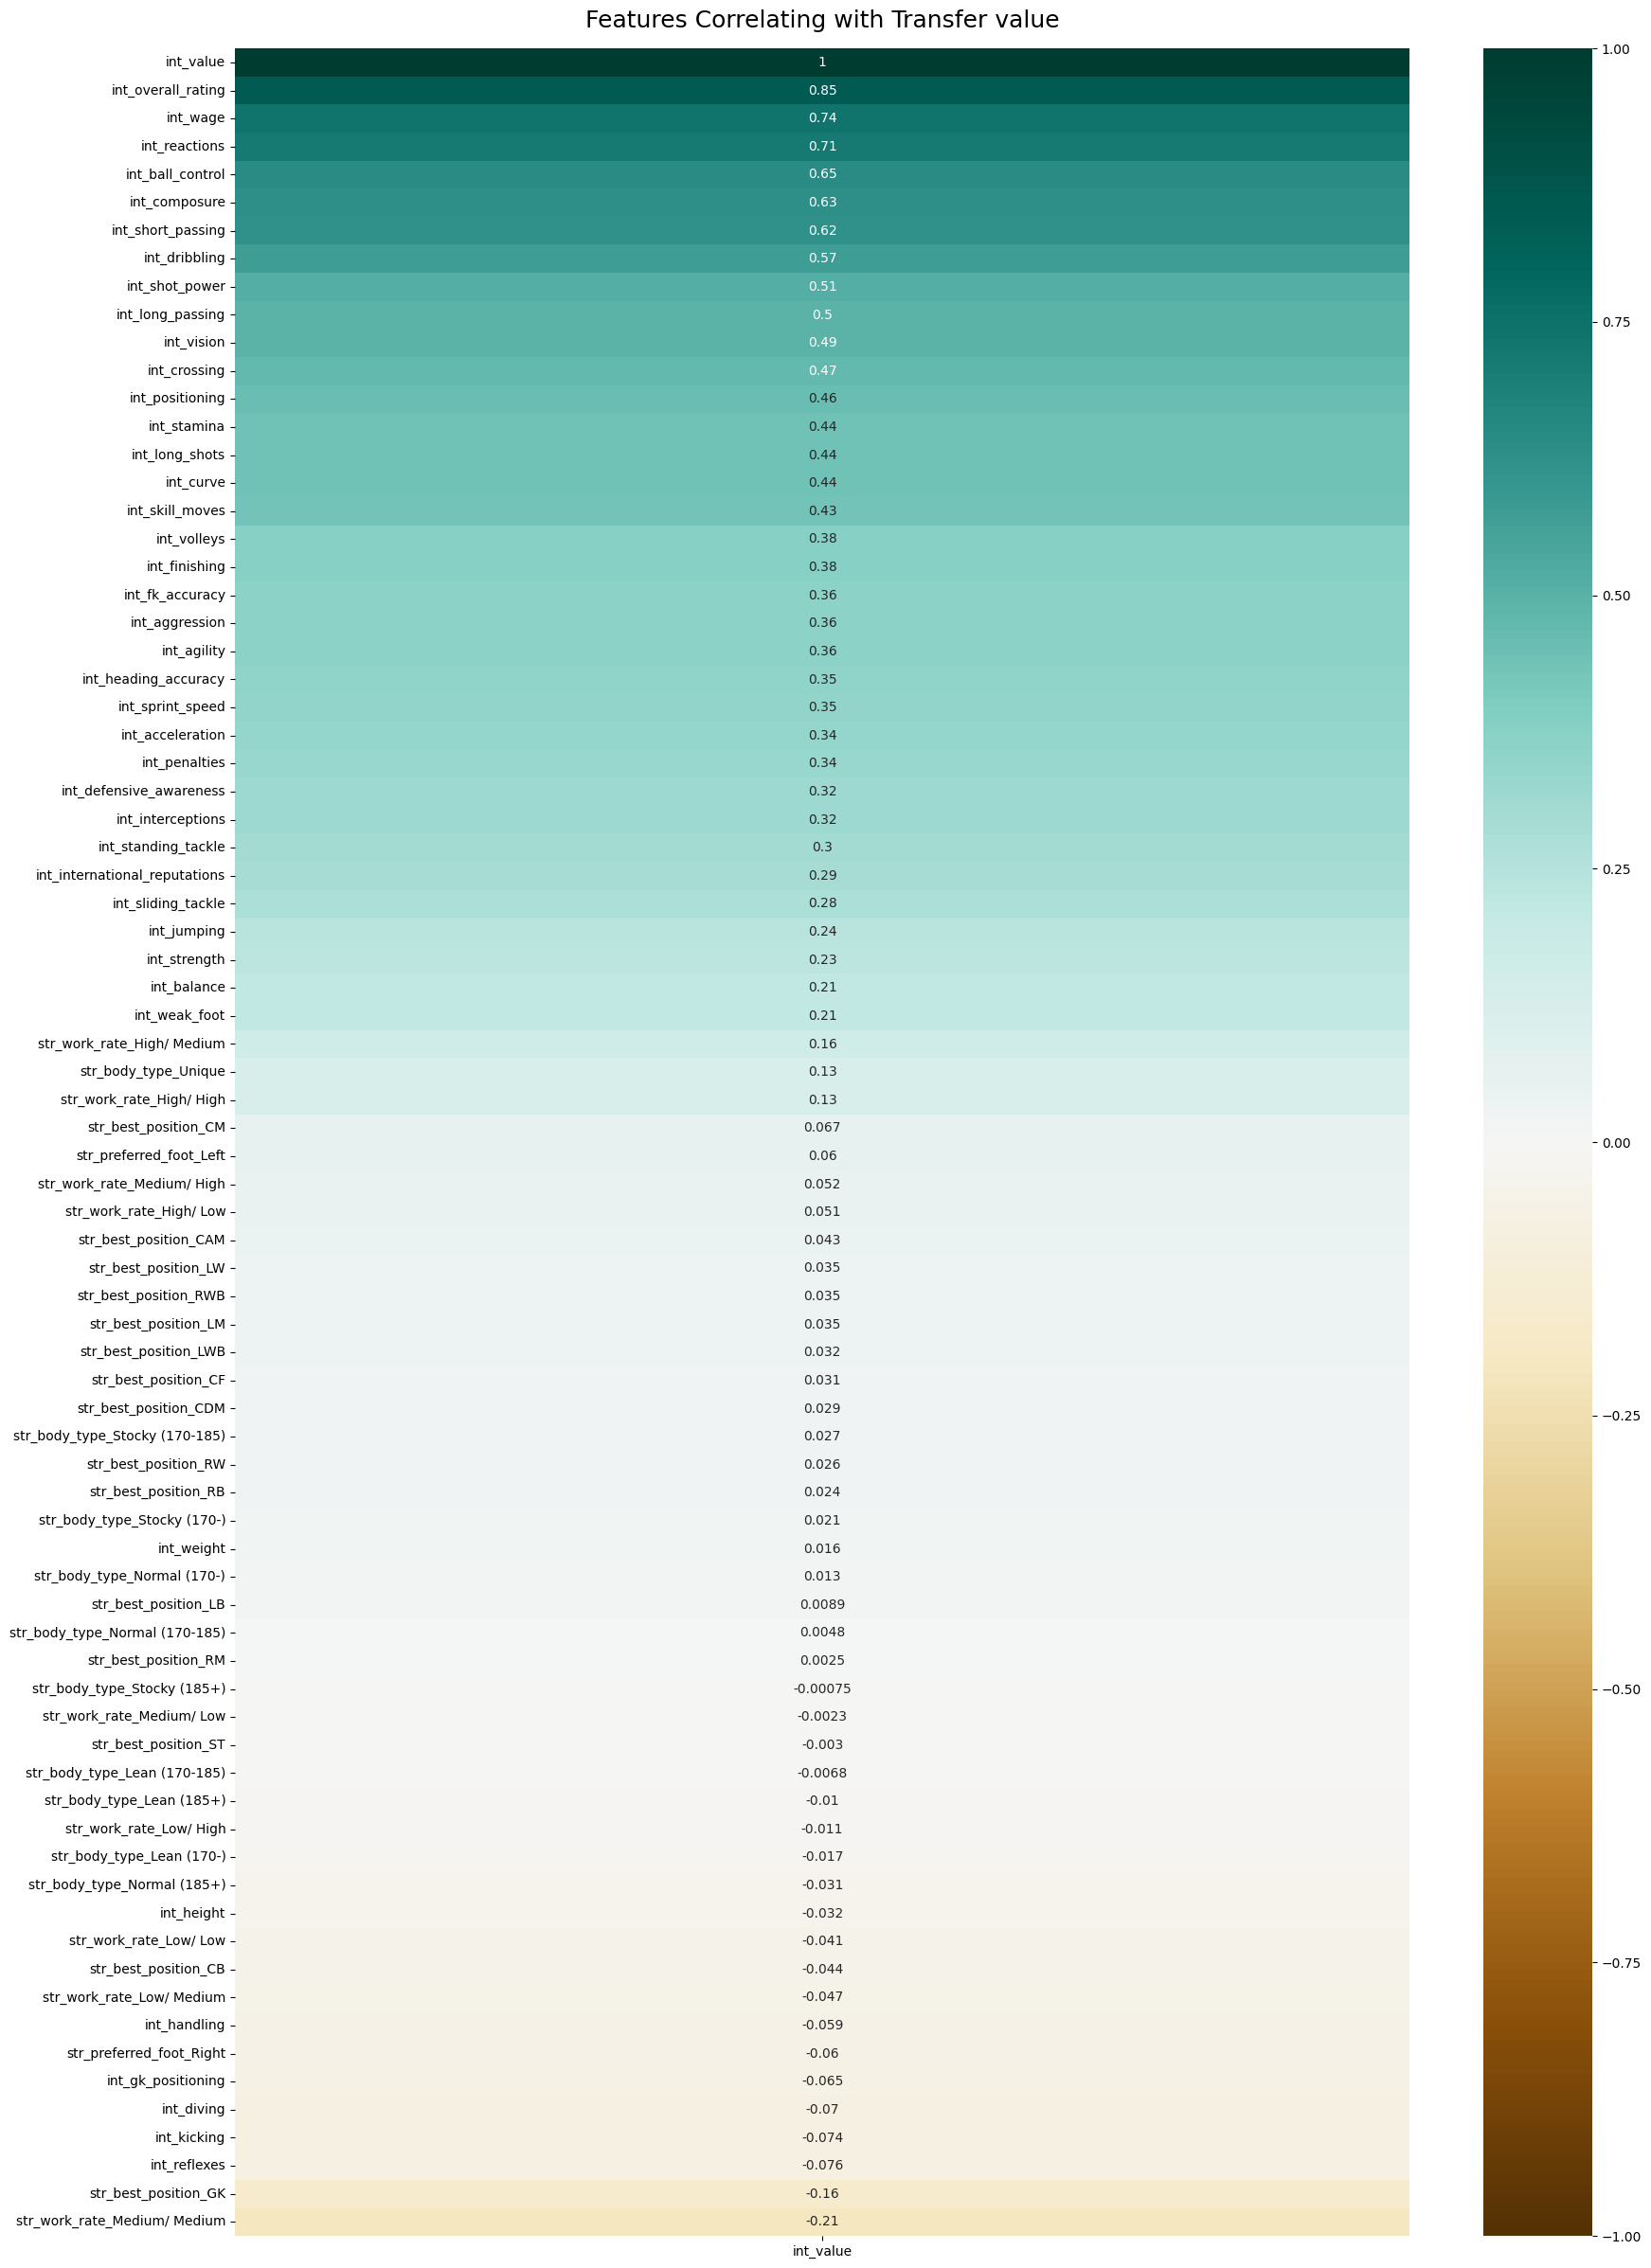

In [41]:
plt.figure(figsize=(20, 30))
heatmap = sns.heatmap(final_df.corr('spearman')[['int_value']].sort_values(by='int_value', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Transfer value', fontdict={'fontsize':18}, pad=16);

In [42]:
y_value = df_final["int_value"]
X_value = df_final.drop("int_value", axis=1)

X_train_value, X_test_value, y_train_value, y_test_value = train_test_split(X_value, y_value, test_size=0.3)

std = StandardScaler()
X_train_std_value = std.fit_transform(X_train_value)
X_test_std_value = std.transform(X_test_value)

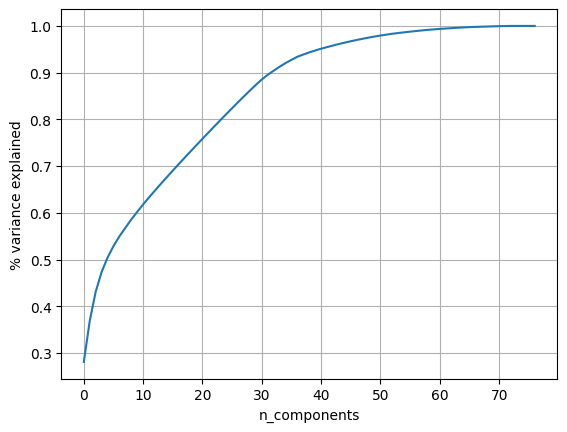

In [43]:
pca_value = PCA(n_components = X_train_std_value.shape[1])
pca_data_value = pca_value.fit_transform(X_train_std_value)

percent_var_explained_value = pca_value.explained_variance_/(np.sum(pca_value.explained_variance_))
cumm_var_explained_value = np.cumsum(percent_var_explained_value)

plt.plot(cumm_var_explained_value)
plt.grid()
plt.xlabel("n_components")
plt.ylabel("% variance explained")
plt.show()

In [44]:
sum(pca_value.explained_variance_ratio_)

0.9999999999999999

In [45]:
pca_value = PCA(n_components=60)
pca_train_data_value = pca_value.fit_transform(X_train_std_value)
pca_test_data_value = pca_value.transform(X_test_std_value)

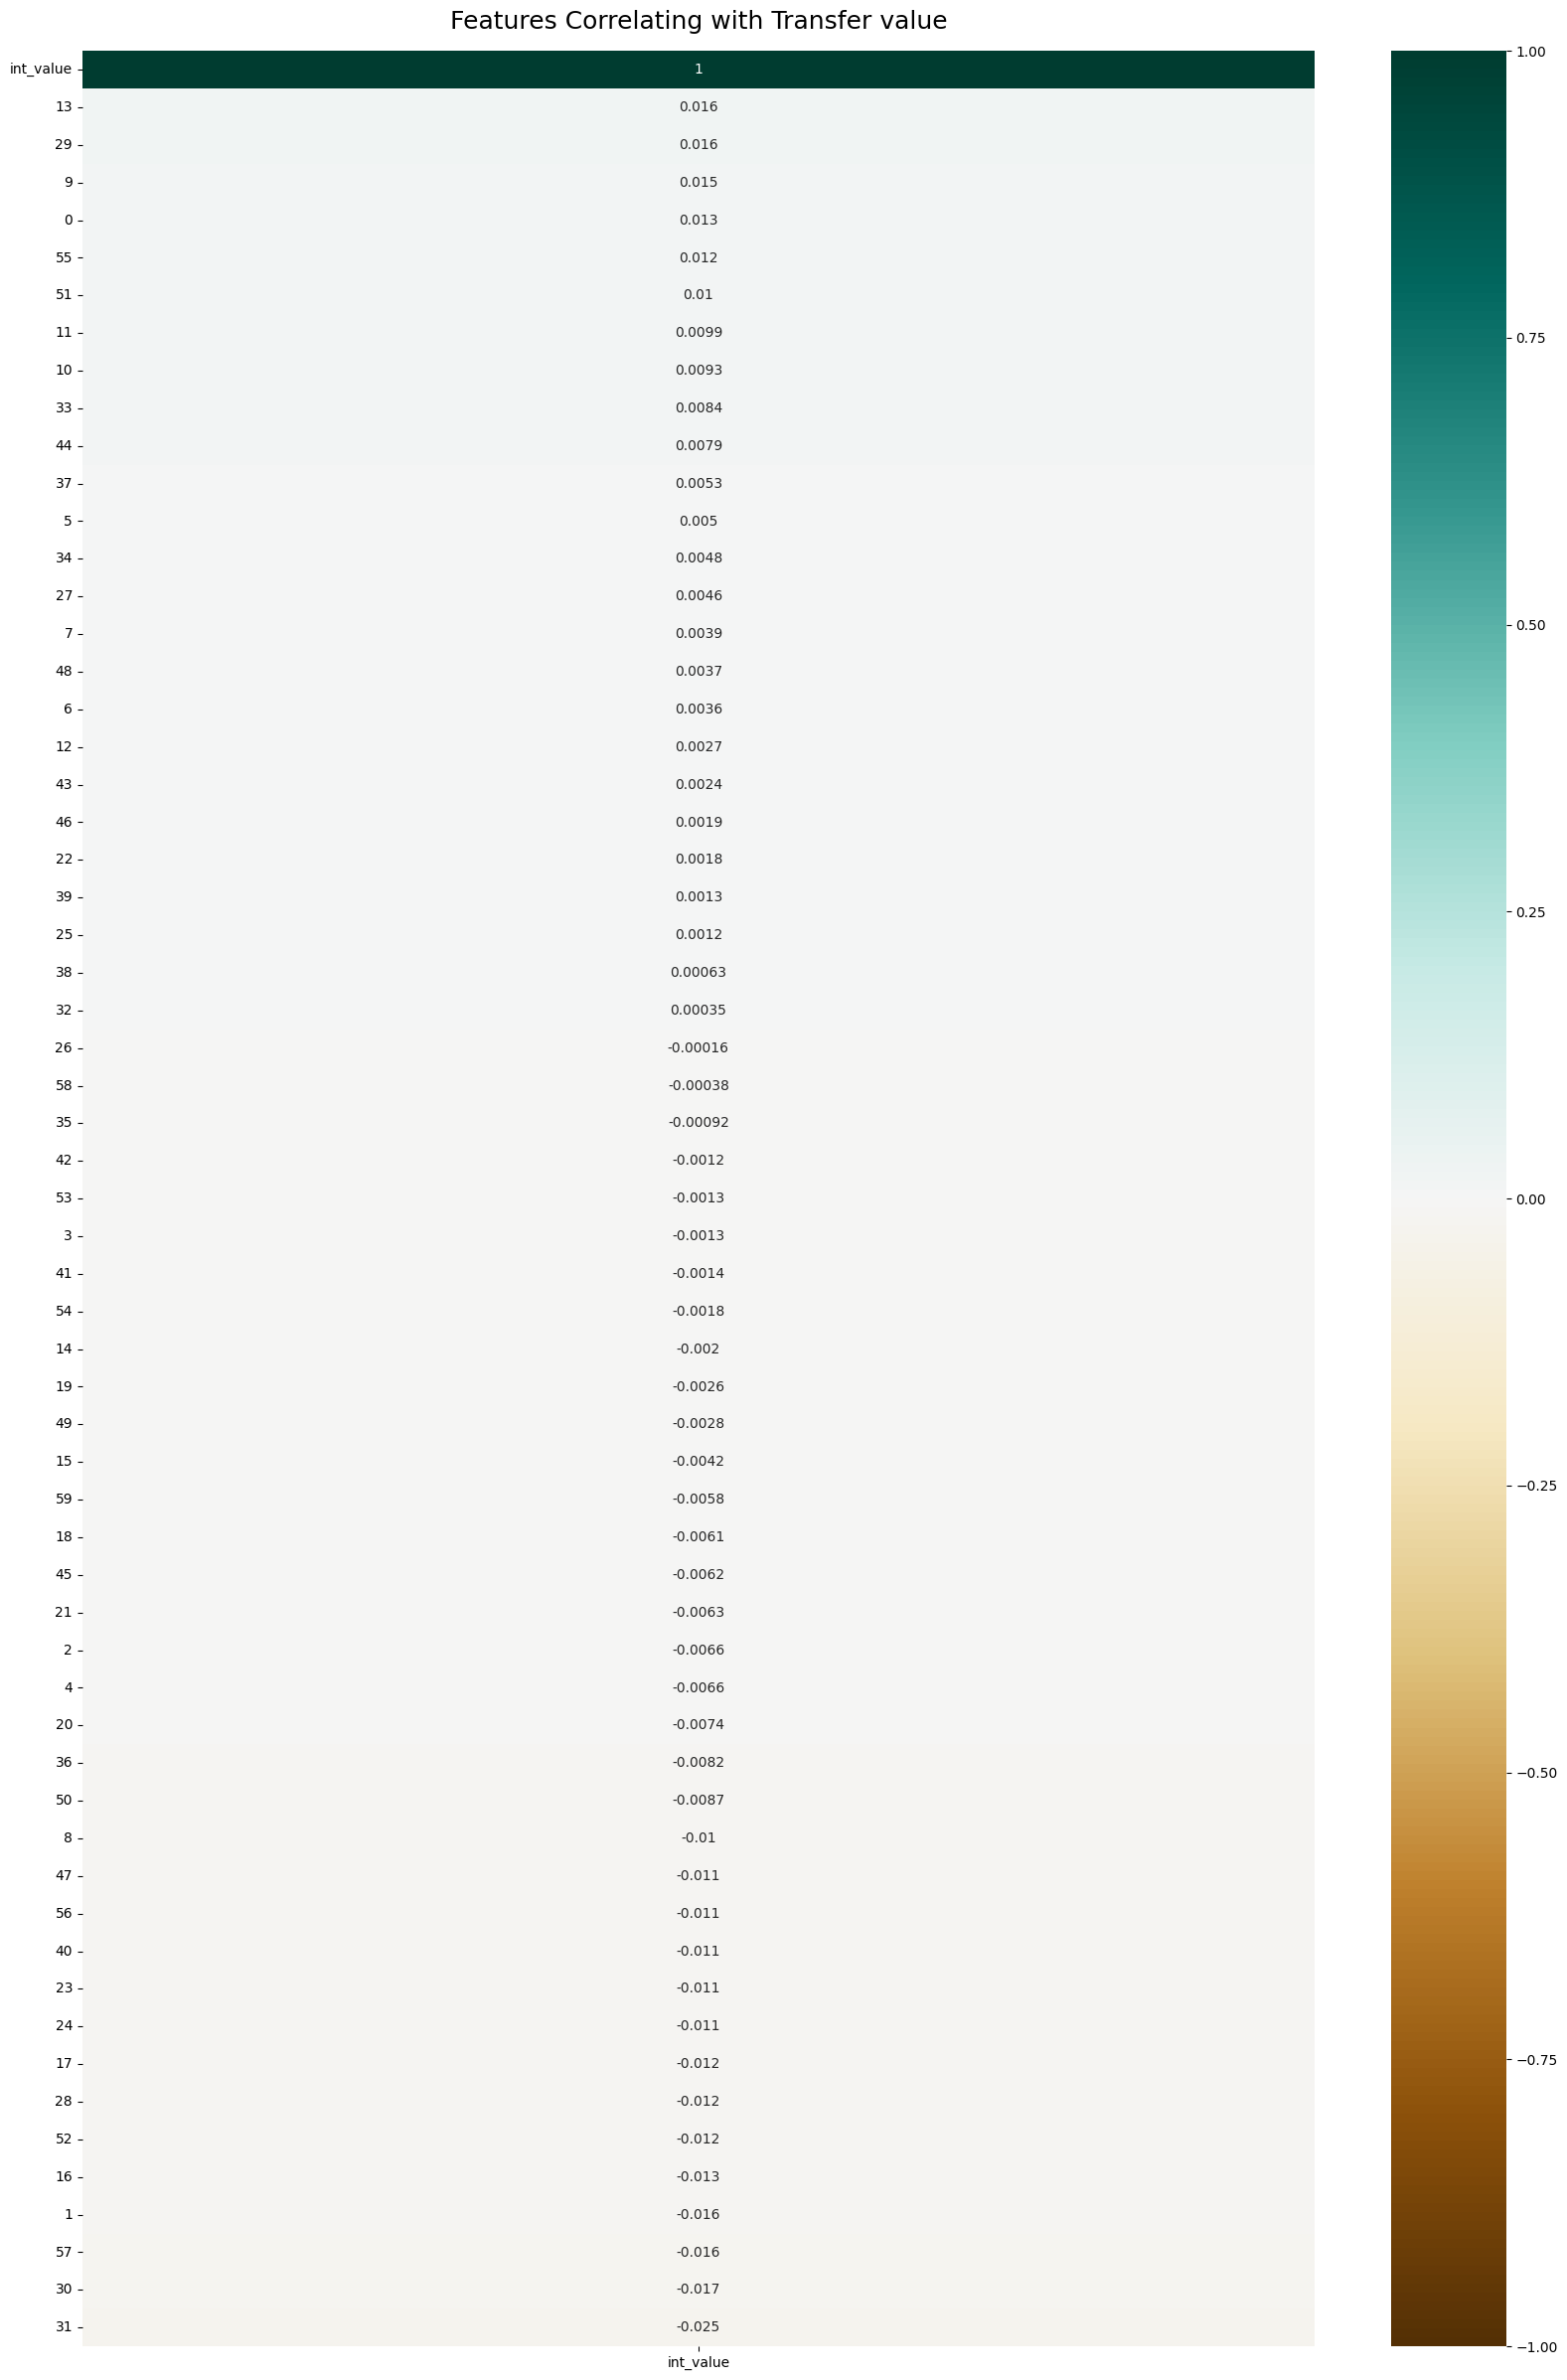

In [46]:
df_train_pca_value = pd.DataFrame(pca_train_data_value)
df_train_pca_value["int_value"] = y_train_value

plt.figure(figsize=(20, 30))
heatmap = sns.heatmap(df_train_pca_value.corr('spearman')[['int_value']].sort_values(by='int_value', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Transfer value', fontdict={'fontsize':18}, pad=16);

In [47]:
df_train_pca_value = df_train_pca_value.drop("int_value", axis = 1)
vif = pd.DataFrame()
vif['PCA_Features'] = df_train_pca_value.columns
vif['PCA_VIF'] = [variance_inflation_factor(df_train_pca_value.values, i) for i in range(df_train_pca_value.shape[1])]
vif['PCA_VIF'] = round(vif['PCA_VIF'], 2)
vif = vif.sort_values(by = "PCA_VIF")
vif

PCA_Features  PCA_VIF
0             0      1.0
32           32      1.0
33           33      1.0
34           34      1.0
35           35      1.0
36           36      1.0
37           37      1.0
38           38      1.0
39           39      1.0
40           40      1.0
41           41      1.0
42           42      1.0
43           43      1.0
31           31      1.0
44           44      1.0
46           46      1.0
47           47      1.0
48           48      1.0
49           49      1.0
50           50      1.0
51           51      1.0
52           52      1.0
53           53      1.0
54           54      1.0
55           55      1.0
56           56      1.0
57           57      1.0
45           45      1.0
30           30      1.0
29           29      1.0
28           28      1.0
1             1      1.0
2             2      1.0
3             3      1.0
4             4      1.0
5             5      1.0
6             6      1.0
7             7      1.0
8             8      1.0
9             9      1.0
10           10      1.0
11           11      1.0
12           12      1.0
13           13      1.0
14           14      1.0
15           15      1.0
16           16      1.0
17           17      1.0
18           18      1.0
19           19      1.0
20           20      1.0
21           21      1.0
22           22      1.0
23           23      1.0
24           24      1.0
25           25      1.0
26           26      1.0
27           27      1.0
58           58      1.0
59           59      1.0

In [48]:
df_train_pca_value.shape

(13301, 60)

In [49]:
import xgboost as xgb

# create a XGBRegressor object
xgb_regr = xgb.XGBRegressor(n_estimators=100, random_state=42)

# fit the model on the training data
xgb_regr.fit(df_train_pca_value, y_train_value)

# make predictions on the test data
y_pred_value = xgb_regr.predict(pca_test_data_value)

# evaluate the model performance
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test_value, y_pred_value)

print("R-squared score:", r2)
print("Mean Absolute Error:", mae)

R-squared score: 0.8619536642507891
Mean Absolute Error: 1200214.9523051097


In [50]:
from sklearn.tree import DecisionTreeRegressor

# create a DecisionTreeRegressor object
dt_regr = DecisionTreeRegressor(random_state=42)

# fit the model on the training data
dt_regr.fit(df_train_pca_value, y_train_value)

# make predictions on the test data
y_pred_value = dt_regr.predict(pca_test_data_value)

# evaluate the model performance
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test_value, y_pred_value)
mae = mean_absolute_error(y_test_value, y_pred_value)

print("R-squared score:", r2)
print("Mean Absolute Error:", mae)


R-squared score: 0.5097661600098122
Mean Absolute Error: 1760178.9159796527


In [51]:
from sklearn.linear_model import LinearRegression

# create a LinearRegression object
lr_regr = LinearRegression()

# fit the model on the training data
lr_regr.fit(df_train_pca_value, y_train_value)

# make predictions on the test data
y_pred_value = lr_regr.predict(pca_test_data_value)

# evaluate the model performance
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test_value, y_pred_value)
mae = mean_absolute_error(y_test_value, y_pred_value)

print("R-squared score:", r2)
print("Mean Absolute Error:", mae)

R-squared score: 0.7368147969201132
Mean Absolute Error: 1825599.143626513


In [52]:
huber = HuberRegressor()

# Define the hyperparameters and their values to be tested
parameters = {'epsilon': [1.35, 1.5, 1.75],
              'alpha': [0.0001, 0.001, 0.01]}

# Create a GridSearchCV object with the HuberRegressor model and the defined hyperparameters
grid_search = GridSearchCV(huber, parameters, cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(df_train_pca_value, y_train_value)

# Get the best estimator from the GridSearchCV object
best_estimator = grid_search.best_estimator_

# Evaluate the best estimator on the test data
test_score = best_estimator.score(pca_test_data_value, y_test_value)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)
print("Test score: ", test_score)


Best parameters:  {'alpha': 0.0001, 'epsilon': 1.75}
Best score:  0.6482462025103359
Test score:  0.6695882384547134


In [53]:
huber = HuberRegressor(alpha=0.0001,epsilon=1.75)

# fit the model on the training data
huber.fit(df_train_pca_value, y_train_value)

# make predictions on the test data
y_pred_value = huber.predict(pca_test_data_value)

# evaluate the model performance
from sklearn.metrics import r2_score, mean_absolute_error

r2 = r2_score(y_test_value, y_pred_value)
mae = mean_absolute_error(y_test_value, y_pred_value)

print("R-squared score:", r2)
print("Mean Absolute Error:", mae)

R-squared score: 0.6695882384547134
Mean Absolute Error: 1502100.6875682455
